<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

In [184]:
# import the pacakges
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

# sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# feature engine
import feature_engine.imputation as mdi
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder, RareLabelEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser, EqualWidthDiscretiser
from feature_engine.transformation import LogTransformer, ReciprocalTransformer, PowerTransformer, BoxCoxTransformer, YeoJohnsonTransformer
from feature_engine.outliers import Winsorizer
from feature_engine.imputation import MeanMedianImputer, RandomSampleImputer


# Visual
import scipy.stats as stats
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')




In [185]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

### Step 1: Load and Explore the Data 
[Back to report](#report)
<a id="loadData"></a>

#### Circuits

In [186]:
circuitsDF = pd.read_csv('./f1db_csv_mod/circuits_mod.csv')
circuitsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   79 non-null     int64  
 1   circuitRef  79 non-null     object 
 2   name        79 non-null     object 
 3   location    79 non-null     object 
 4   country     79 non-null     object 
 5   lat         79 non-null     float64
 6   lng         79 non-null     float64
 7   alt         79 non-null     object 
 8   url         79 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.7+ KB


In [187]:
circuitsDF.head()

circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4         http://en.wikipedia.org/wiki/Istanbul_Park

In [188]:
circuitsDF.describe()

circuitId        lat         lng
count  79.000000  79.000000   79.000000
mean   40.000000  33.517913    3.097033
std    22.949219  22.626026   64.963691
min     1.000000 -37.849700 -118.189000
25%    20.500000  32.058150   -9.298615
50%    40.000000  40.951700    4.326940
75%    59.500000  47.081400   23.561100
max    79.000000  57.265300  144.968000

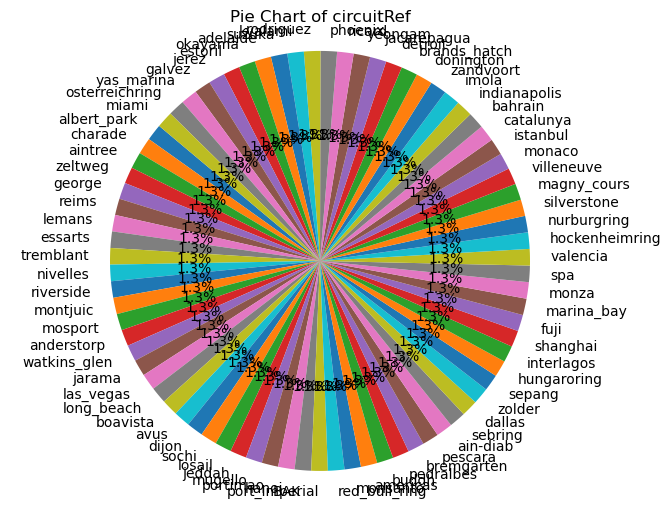

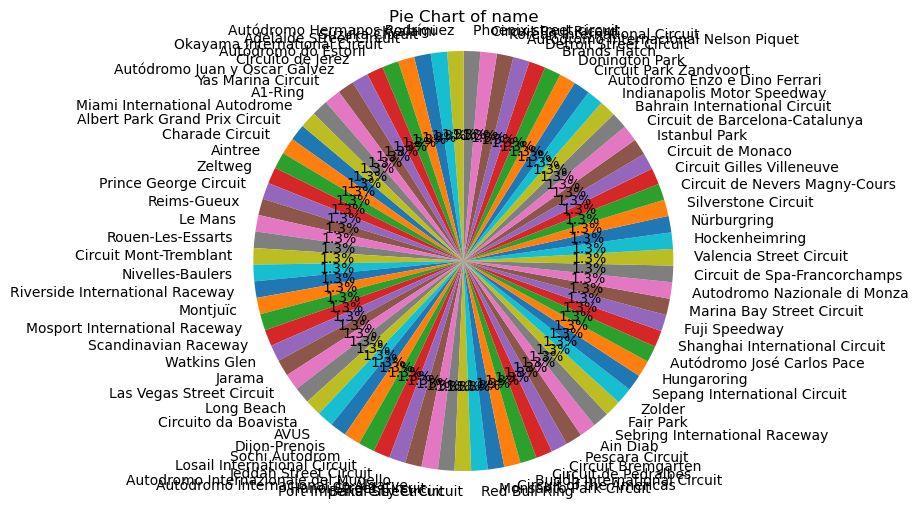

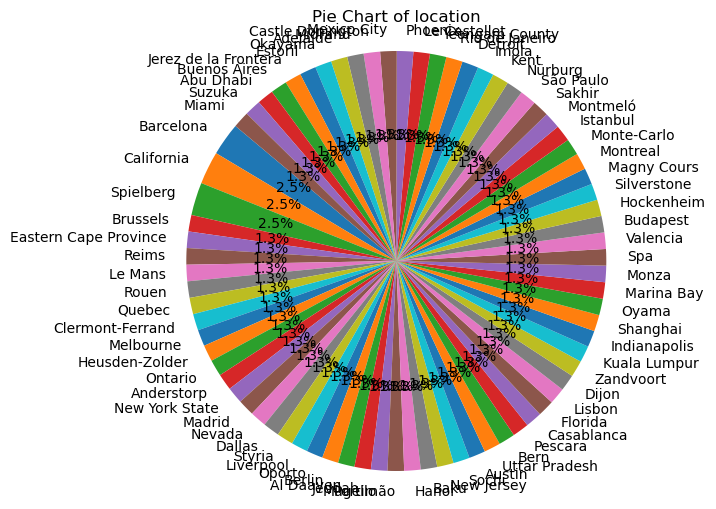

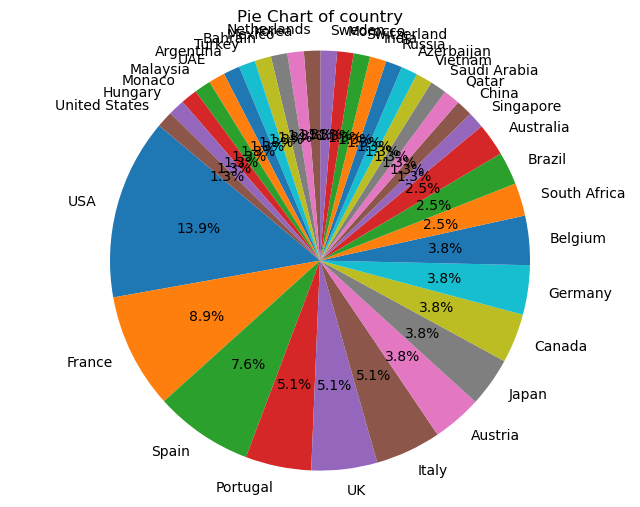

In [189]:
catCols = ['circuitRef', 'name', 'location' ,'country']
for col in catCols:
    plt.figure(figsize=(8, 6))
    value_counts = circuitsDF[col].value_counts()
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart of {col}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

<Axes: >

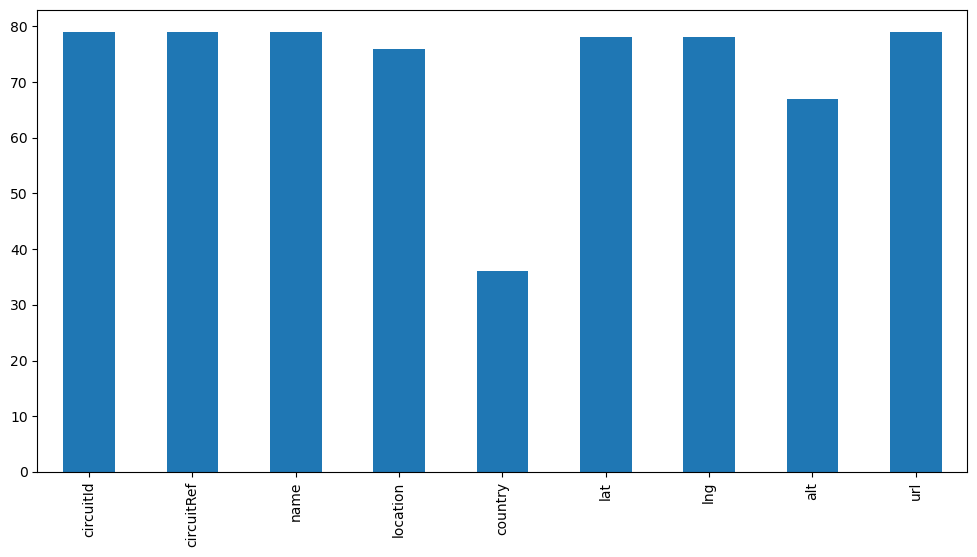

In [190]:
circuitsDF.nunique().plot.bar(figsize = (12, 6))

#### ConstructResults

In [191]:
construct_resultsDF = pd.read_csv('./f1db_csv_mod/constructor_results_mod.csv')
construct_resultsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11950 entries, 0 to 11949
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  11950 non-null  int64  
 1   raceId                11950 non-null  int64  
 2   constructorId         11950 non-null  int64  
 3   points                11950 non-null  float64
 4   status                11950 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 466.9+ KB


In [192]:
construct_resultsDF.head()
#it looks like the tables replace their null values with \N

constructorResultsId  raceId  constructorId  points status
0                     1      18              1    14.0     \N
1                     2      18              2     8.0     \N
2                     3      18              3     9.0     \N
3                     4      18              4     5.0     \N
4                     5      18              5     2.0     \N

In [193]:
construct_resultsDF.describe()

constructorResultsId        raceId  constructorId        points
count          11950.000000  11950.000000   11950.000000  11950.000000
mean            7951.200753    495.265690      43.215230      3.661757
std             5452.516726    290.480497      56.084031      7.203368
min                1.000000      1.000000       1.000000      0.000000
25%             2988.250000    274.000000       6.000000      0.000000
50%             5975.500000    467.000000      22.000000      0.000000
75%            13428.750000    694.000000      51.000000      4.000000
max            16449.000000   1073.000000     214.000000     66.000000

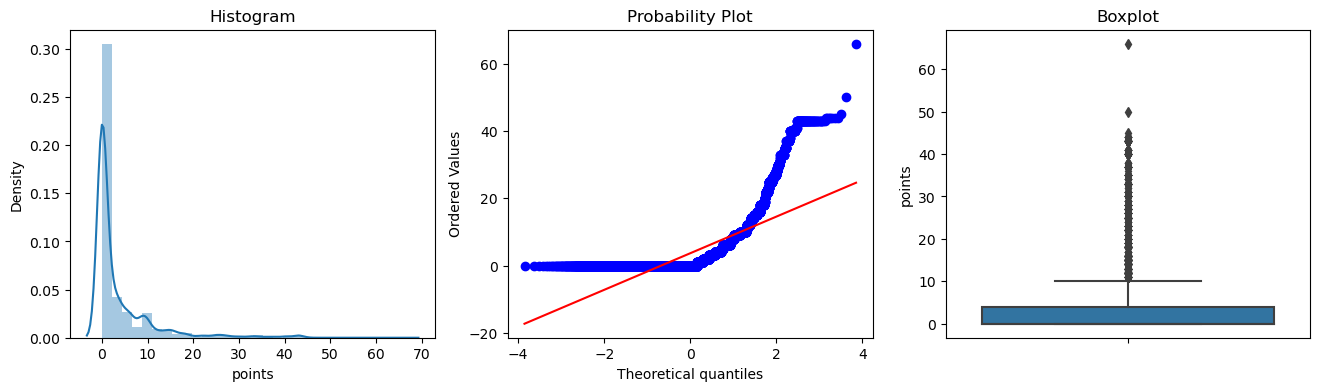

In [194]:
diagnostic_plots(construct_resultsDF, 'points')

<Axes: >

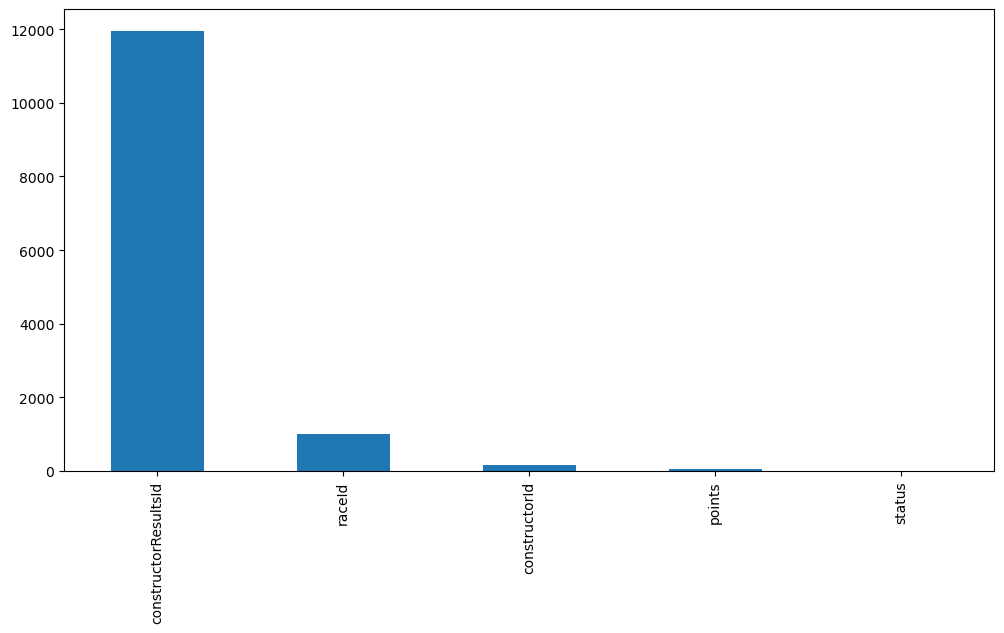

In [195]:
construct_resultsDF.nunique().plot.bar(figsize = (12, 6))

#### ConstructStandings

In [196]:
construct_standingsDF = pd.read_csv('./f1db_csv_mod/constructor_standings_mod.csv')
construct_standingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12716 entries, 0 to 12715
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  12716 non-null  int64  
 1   raceId                  12716 non-null  int64  
 2   constructorId           12716 non-null  int64  
 3   points                  12716 non-null  float64
 4   position                12716 non-null  int64  
 5   positionText            12716 non-null  object 
 6   wins                    12716 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 695.5+ KB


In [197]:
construct_standingsDF.head()

constructorStandingsId  raceId  constructorId  points  position  \
0                       1      18              1    14.0         1   
1                       2      18              2     8.0         3   
2                       3      18              3     9.0         2   
3                       4      18              4     5.0         4   
4                       5      18              5     2.0         5   

  positionText  wins  
0            1     1  
1            3     0  
2            2     0  
3            4     0  
4            5     0

In [198]:
construct_standingsDF.describe()

constructorStandingsId        raceId  constructorId        points  \
count            12716.000000  12716.000000   12716.000000  12716.000000   
mean             15990.742529    505.302218      47.262504     32.244299   
std               8748.089506    285.123256      58.451136     73.503280   
min                  1.000000      1.000000       1.000000      0.000000   
25%               8449.750000    291.000000       6.000000      0.000000   
50%              19547.500000    487.000000      25.000000      6.000000   
75%              24168.250000    702.000000      57.000000     29.125000   
max              27942.000000   1074.000000     214.000000    765.000000   

           position          wins  
count  12716.000000  12716.000000  
mean       7.315901      0.671044  
std        4.402105      1.788436  
min        1.000000      0.000000  
25%        4.000000      0.000000  
50%        7.000000      0.000000  
75%       10.000000      0.000000  
max       22.000000     19.000000

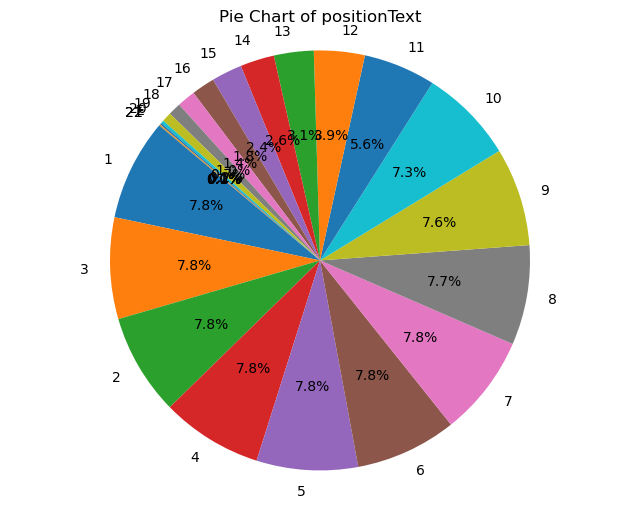

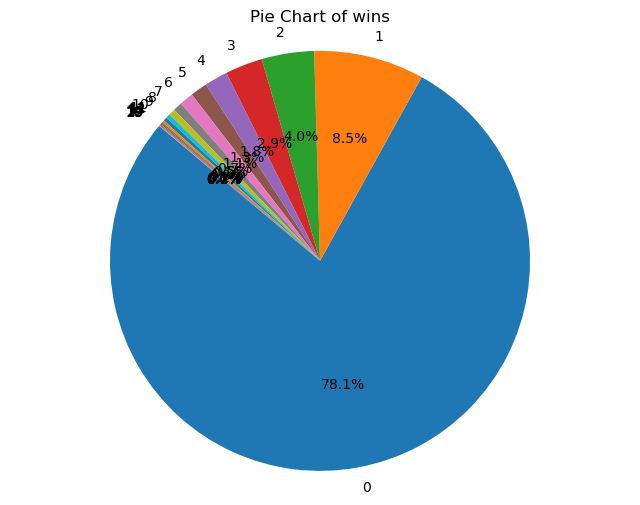

In [199]:
catCols = ['positionText', 'wins']
for col in catCols:
    plt.figure(figsize=(8, 6))
    value_counts = construct_standingsDF[col].value_counts()
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart of {col}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

<Axes: >

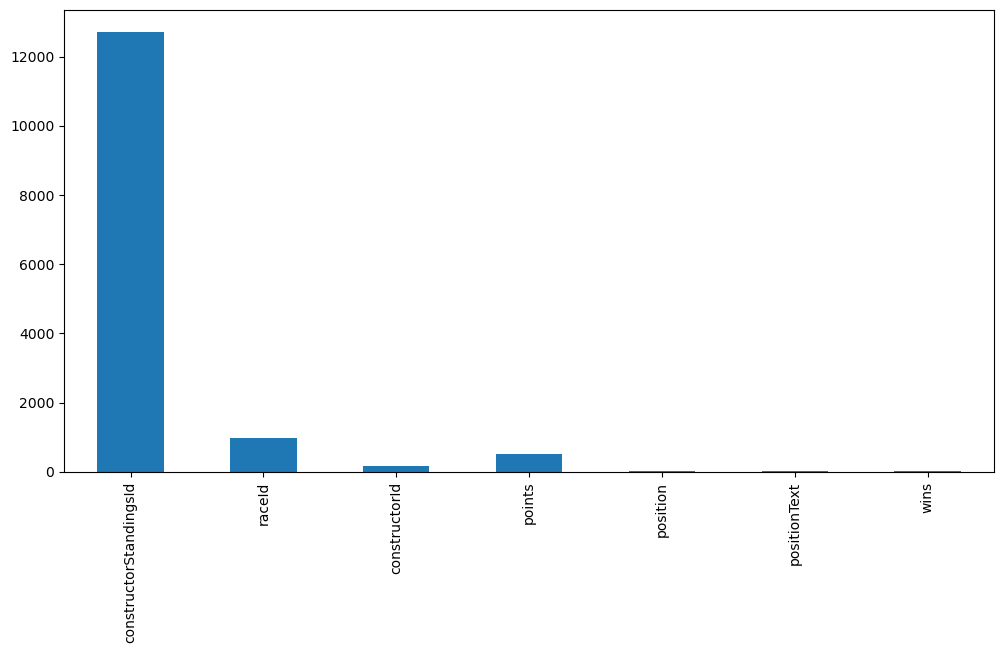

In [200]:
construct_standingsDF.nunique().plot.bar(figsize = (12, 6))

#### Constructors

In [201]:
constructsDF = pd.read_csv('./f1db_csv_mod/constructors_mod.csv')
constructsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


In [202]:
constructsDF.head()

constructorId constructorRef        name nationality  \
0              1        mclaren     McLaren     British   
1              2     bmw_sauber  BMW Sauber      German   
2              3       williams    Williams     British   
3              4        renault     Renault      French   
4              5     toro_rosso  Toro Rosso     Italian   

                                                 url  
0               http://en.wikipedia.org/wiki/McLaren  
1            http://en.wikipedia.org/wiki/BMW_Sauber  
2  http://en.wikipedia.org/wiki/Williams_Grand_Pr...  
3  http://en.wikipedia.org/wiki/Renault_in_Formul...  
4   http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso

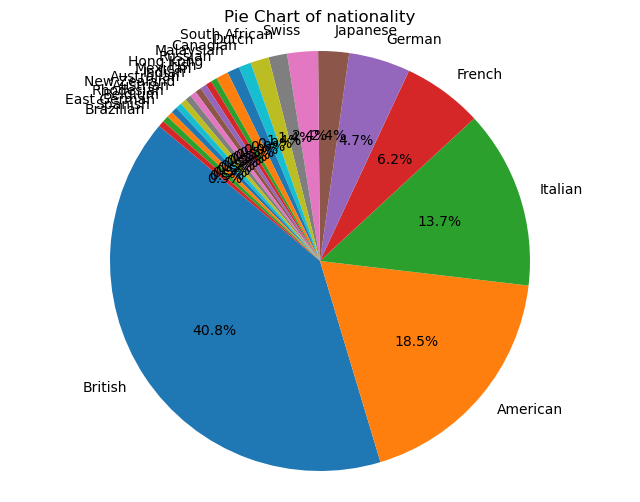

In [203]:
catCols = ['nationality']
for col in catCols:
    plt.figure(figsize=(8, 6))
    value_counts = constructsDF[col].value_counts()
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart of {col}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

<Axes: >

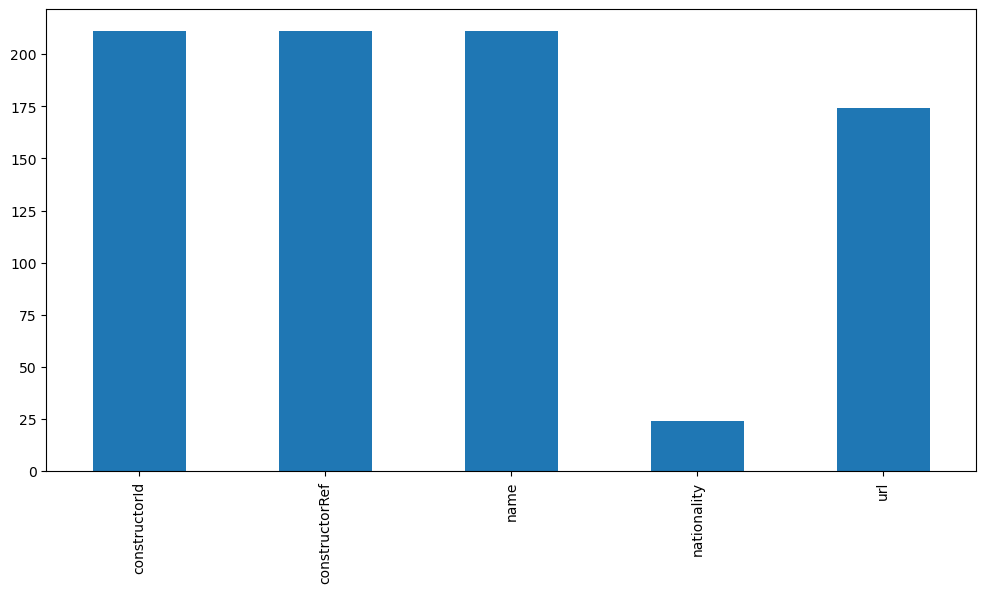

In [204]:
constructsDF.nunique().plot.bar(figsize = (12, 6))

#### Driver Standings

In [205]:
driver_standingsDF = pd.read_csv('./f1db_csv_mod/driver_standings_mod.csv')
driver_standingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33394 entries, 0 to 33393
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   driverStandingsId  33394 non-null  int64 
 1   raceId             33394 non-null  int64 
 2   driverId           33394 non-null  int64 
 3   points             33389 non-null  object
 4   position           33394 non-null  int64 
 5   positionText       33394 non-null  object
 6   wins               33394 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [206]:
driver_standingsDF.head()

driverStandingsId  raceId  driverId points  position positionText  wins
0                  1      18         1     10         1            1     1
1                  2      18         2      8         2            2     0
2                  3      18         3      6         3            3     0
3                  4      18         4      5         4            4     0
4                  5      18         5      4         5            5     0

In [207]:
driver_standingsDF.describe()

driverStandingsId        raceId      driverId      position  \
count       33394.000000  33394.000000  33394.000000  33394.000000   
mean        41053.589327    562.539977    298.800114     20.077289   
std         21717.997691    276.659109    259.756294     16.499785   
min             1.000000      1.000000      1.000000      1.000000   
25%         19061.250000    342.000000     84.000000      8.000000   
50%         48903.500000    587.000000    212.000000     16.000000   
75%         57992.750000    789.000000    484.000000     26.000000   
max         70780.000000   1074.000000    855.000000    108.000000   

               wins  
count  33394.000000  
mean       0.265407  
std        0.974147  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       13.000000

<Axes: >

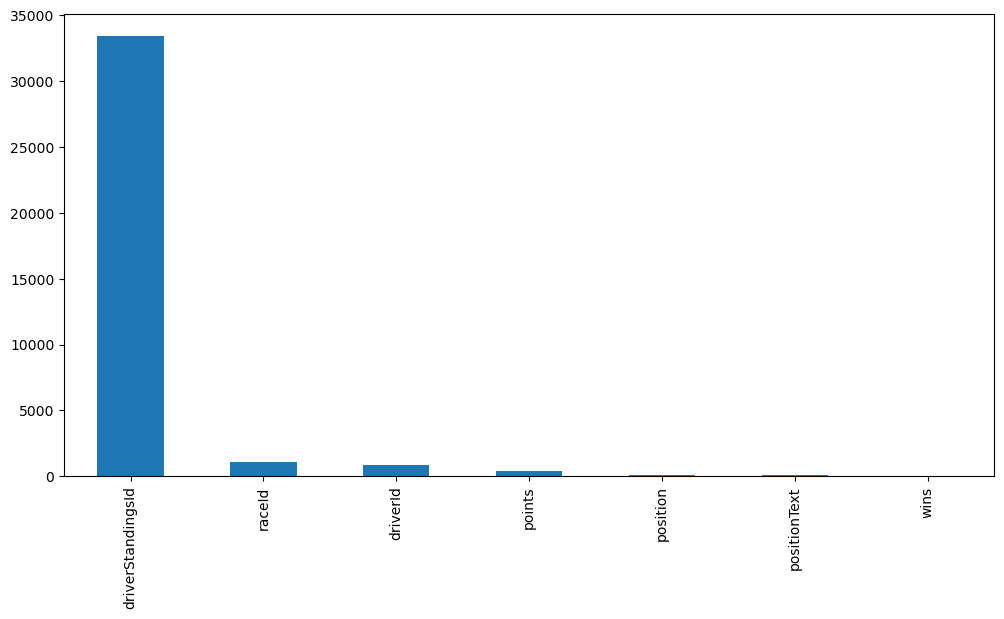

In [208]:
driver_standingsDF.nunique().plot.bar(figsize = (12, 6))

#### Drivers

In [209]:
driversDF = pd.read_csv('./f1db_csv_mod/drivers_mod.csv')
driversDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     854 non-null    int64 
 1   driverRef    854 non-null    object
 2   number       854 non-null    object
 3   code         854 non-null    object
 4   forename     854 non-null    object
 5   surname      854 non-null    object
 6   dob          854 non-null    object
 7   nationality  854 non-null    object
 8   url          854 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.2+ KB


In [210]:
driversDF.head()

driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen

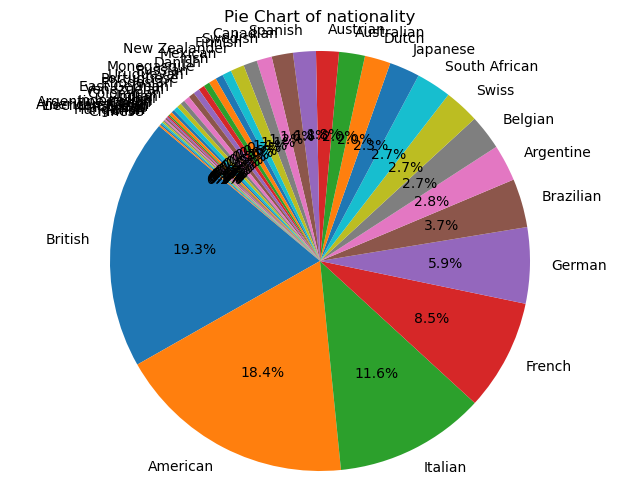

In [211]:
catCols = ['nationality']
for col in catCols:
    plt.figure(figsize=(8, 6))
    value_counts = driversDF[col].value_counts()
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart of {col}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

<Axes: >

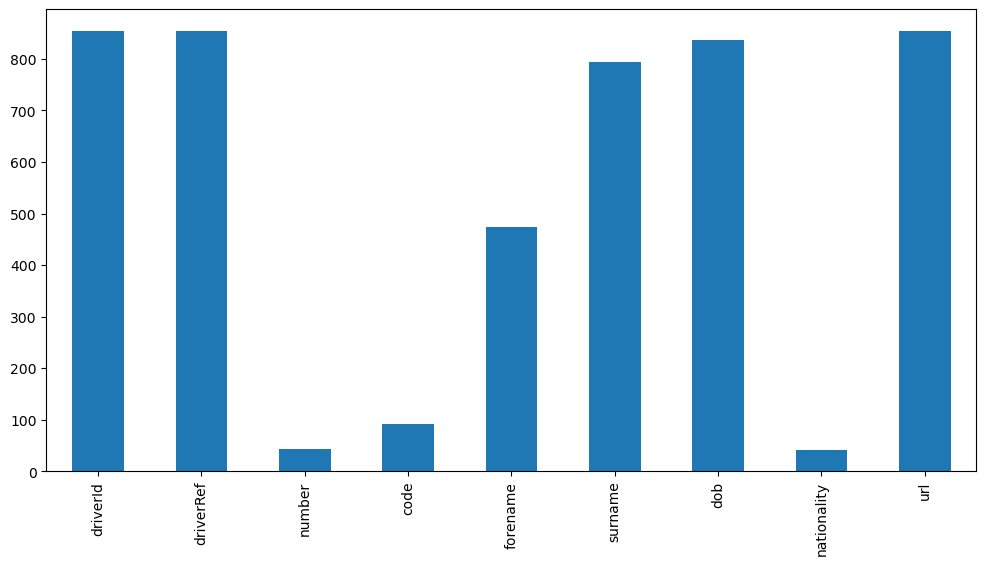

In [212]:
driversDF.nunique().plot.bar(figsize = (12, 6))

#### Lap times

In [213]:
laptimesDF = pd.read_csv('./f1db_csv_mod/lap_times_mod.csv')
laptimesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514592 entries, 0 to 514591
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        514592 non-null  int64 
 1   driverId      514592 non-null  int64 
 2   lap           514592 non-null  int64 
 3   position      514592 non-null  int64 
 4   time          514592 non-null  object
 5   milliseconds  514592 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 23.6+ MB


In [214]:
laptimesDF.head()

raceId  driverId  lap  position      time  milliseconds
0     841        20    1         1  1:38.109         98109
1     841        20    2         1  1:33.006         93006
2     841        20    3         1  1:32.713         92713
3     841        20    4         1  1:32.803         92803
4     841        20    5         1  1:32.342         92342

In [215]:
laptimesDF.describe()

raceId       driverId            lap       position  \
count  514592.000000  514592.000000  514592.000000  514592.000000   
mean      526.829587     265.752592      29.962442       9.650134   
std       415.885396     364.650842      18.419473       5.546670   
min         1.000000       1.000000       1.000000       1.000000   
25%       122.000000      15.000000      14.000000       5.000000   
50%       346.000000      35.000000      29.000000       9.000000   
75%       951.000000     815.000000      44.000000      14.000000   
max      1073.000000     854.000000      87.000000      24.000000   

       milliseconds  
count  5.145920e+05  
mean   9.560792e+04  
std    7.388613e+04  
min    5.540400e+04  
25%    8.204800e+04  
50%    9.065500e+04  
75%    1.023210e+05  
max    7.507547e+06

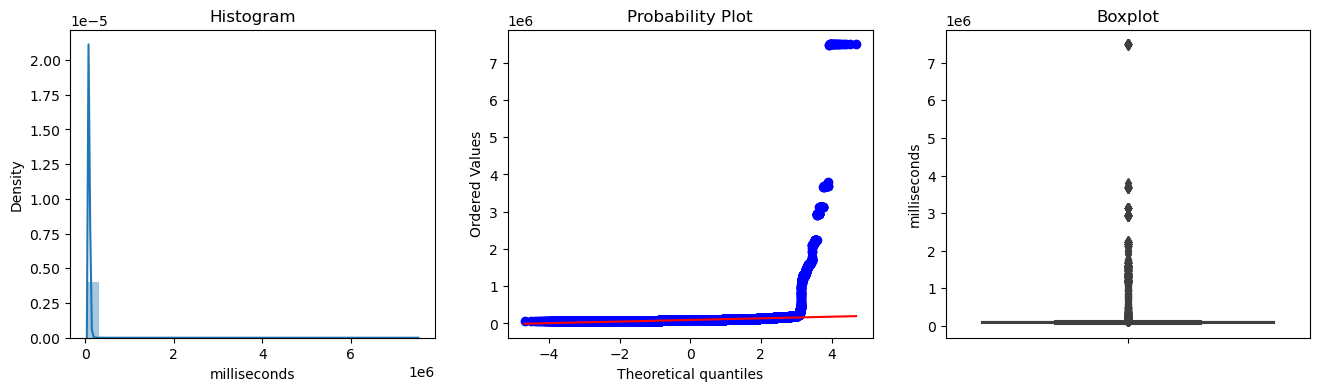

In [216]:
diagnostic_plots(laptimesDF, 'milliseconds')

<Axes: >

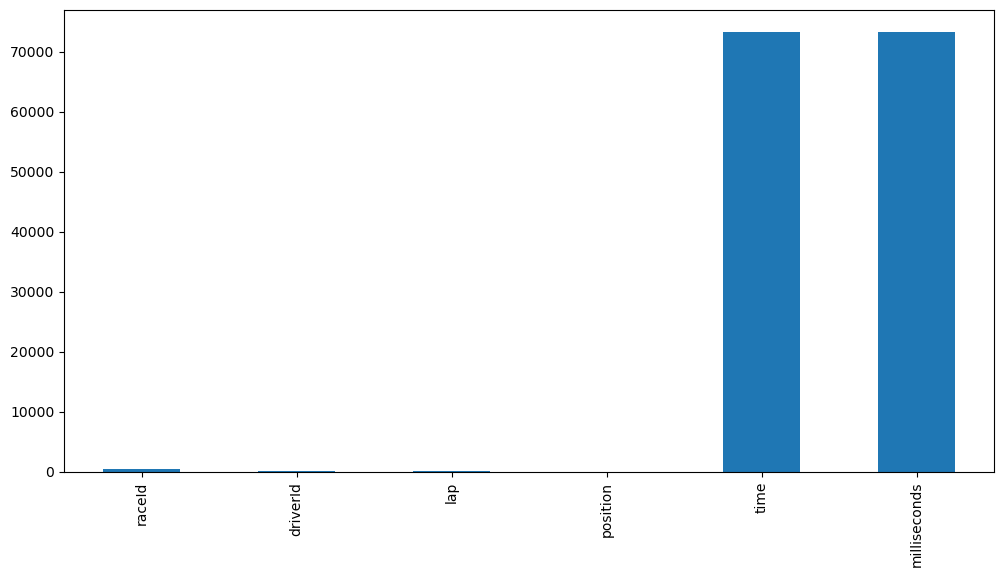

In [217]:
laptimesDF.nunique().plot.bar(figsize = (12, 6))

#### Pitstops

In [218]:
pitstopsDF = pd.read_csv('./f1db_csv_mod/pit_stops_mod.csv')
pitstopsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8828 entries, 0 to 8827
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        8828 non-null   int64 
 1   driverId      8828 non-null   int64 
 2   stop          8828 non-null   int64 
 3   lap           8828 non-null   int64 
 4   time          8828 non-null   object
 5   duration      8828 non-null   object
 6   milliseconds  8828 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 482.9+ KB


In [219]:
pitstopsDF.head()

raceId  driverId  stop  lap      time duration  milliseconds
0     841       153     1    1  17:05:23   26.898         26898
1     841        30     1    1  17:05:52   25.021         25021
2     841        17     1   11  17:20:48   23.426         23426
3     841         4     1   12  17:22:34   23.251         23251
4     841        13     1   13  17:24:10   23.842         23842

In [220]:
pitstopsDF.describe()

raceId     driverId         stop          lap  milliseconds
count  8828.000000  8828.000000  8828.000000  8828.000000  8.828000e+03
mean    944.363049   493.641482     1.768237    25.118034  6.782700e+04
std      69.248219   394.313670     0.923481    14.503790  2.488059e+05
min     841.000000     1.000000     1.000000     1.000000  1.289700e+04
25%     882.000000    17.000000     1.000000    13.000000  2.190300e+04
50%     942.000000   814.000000     2.000000    25.000000  2.352500e+04
75%    1002.000000   828.000000     2.000000    35.000000  2.613200e+04
max    1073.000000   854.000000     6.000000    78.000000  2.077164e+06

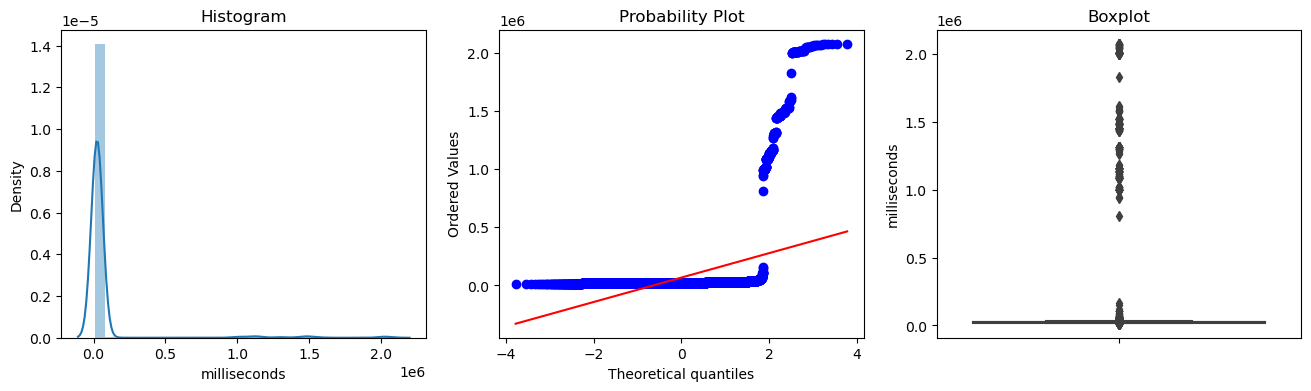

In [221]:
diagnostic_plots(pitstopsDF, 'milliseconds')

<Axes: >

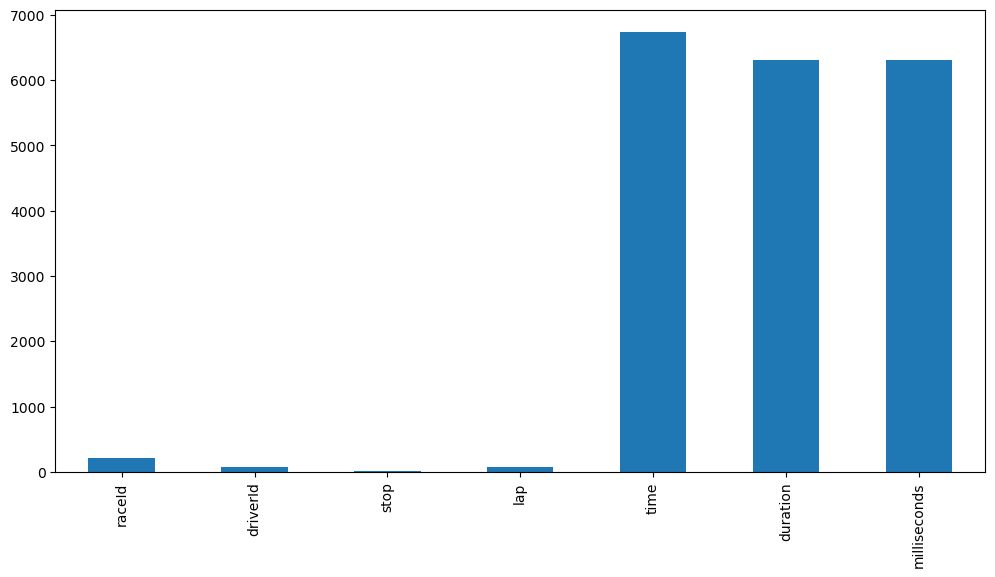

In [222]:
pitstopsDF.nunique().plot.bar(figsize = (12, 6))

#### Qualifying

In [223]:
qualifyingDF = pd.read_csv('./f1db_csv_mod/qualifying_mod.csv')
qualifyingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9135 entries, 0 to 9134
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9135 non-null   int64 
 1   raceId         9135 non-null   int64 
 2   driverId       9135 non-null   int64 
 3   constructorId  9135 non-null   int64 
 4   number         9135 non-null   int64 
 5   position       9135 non-null   int64 
 6   q1             9127 non-null   object
 7   q2             9001 non-null   object
 8   q3             8880 non-null   object
dtypes: int64(6), object(3)
memory usage: 642.4+ KB


In [224]:
qualifyingDF.head()

qualifyId  raceId  driverId  constructorId  number  position        q1  \
0          1      18         1              1      22         1  1:26.572   
1          2      18         9              2       4         2  1:26.103   
2          3      18         5              1      23         3  1:25.664   
3          4      18        13              6       2         4  1:25.994   
4          5      18         2              2       3         5  1:25.960   

         q2        q3  
0  1:25.187  1:26.714  
1  1:25.315  1:26.869  
2  1:25.452  1:27.079  
3  1:25.691  1:27.178  
4  1:25.518  1:27.236

In [225]:
qualifyingDF.describe()

qualifyId       raceId     driverId  constructorId       number  \
count  9135.000000  9135.000000  9135.000000    9135.000000  9135.000000   
mean   4576.769239   552.458128   283.504324      41.008320    17.525342   
std    2647.355274   412.885951   369.432092      67.887418    17.370068   
min       1.000000     1.000000     1.000000       1.000000     0.000000   
25%    2285.500000   111.000000    15.000000       4.000000     7.000000   
50%    4570.000000   842.000000    44.000000       9.000000    14.000000   
75%    6873.500000   956.000000   815.000000      23.000000    21.000000   
max    9175.000000  1073.000000   854.000000     214.000000    99.000000   

          position  
count  9135.000000  
mean     11.300383  
std       6.324415  
min       1.000000  
25%       6.000000  
50%      11.000000  
75%      17.000000  
max      28.000000

#### Races

In [226]:
racesDF = pd.read_csv('./f1db_csv_mod/races_mod.csv')
racesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raceId     1080 non-null   int64 
 1   round      1080 non-null   int64 
 2   circuitId  1080 non-null   int64 
 3   name       1080 non-null   object
 4   date       1070 non-null   object
 5   time       1080 non-null   object
 6   url        1080 non-null   object
dtypes: int64(3), object(4)
memory usage: 59.2+ KB


In [227]:
racesDF.head()

raceId  round  circuitId                   name       date      time  \
0       1      1          1  Australian Grand Prix  3/29/2009   6:00:00   
1       2      2          2   Malaysian Grand Prix  4/5/12009   9:00:00   
2       3      3         17     Chinese Grand Prix  4/19/2009   7:00:00   
3       4      4          3     Bahrain Grand Prix  4/26/2009  12:00:00   
4       5      5          4     Spanish Grand Prix  5/10/2009  12:00:00   

                                                 url  
0  http://en.wikipedia.org/wiki/2009_Australian_G...  
1  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...  
2  http://en.wikipedia.org/wiki/2009_Chinese_Gran...  
3  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...  
4  http://en.wikipedia.org/wiki/2009_Spanish_Gran...

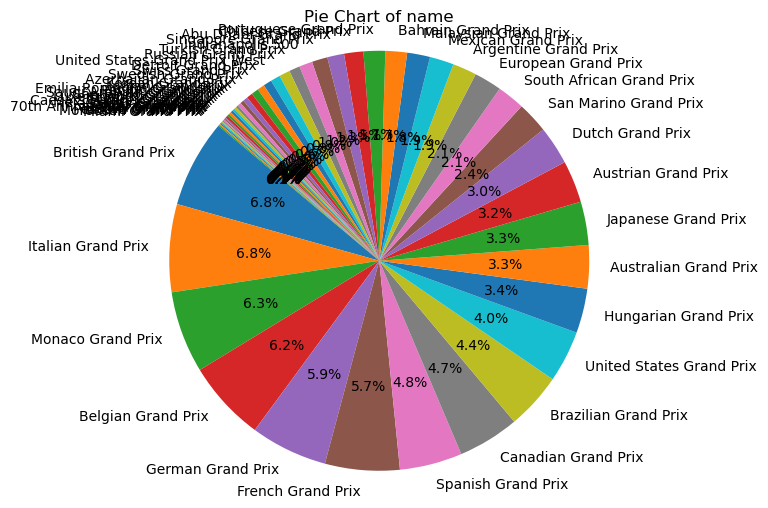

In [228]:
catCols = ['name']
for col in catCols:
    plt.figure(figsize=(8, 6))
    value_counts = racesDF[col].value_counts()
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart of {col}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

<Axes: >

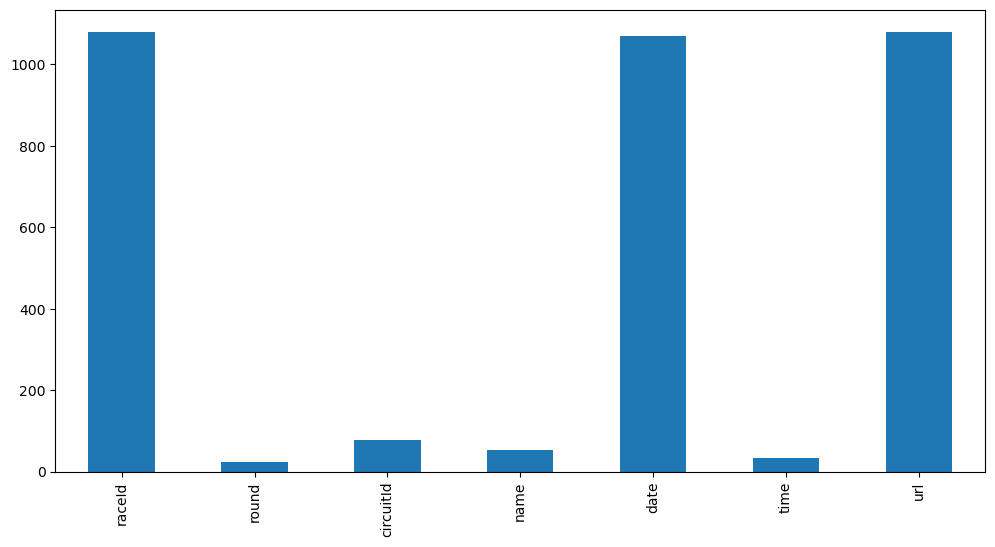

In [229]:
racesDF.nunique().plot.bar(figsize = (12, 6))

#### Results

In [230]:
resultsDF = pd.read_csv('./f1db_csv_mod/results_mod.csv')
resultsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25399 entries, 0 to 25398
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25399 non-null  int64  
 1   raceId           25399 non-null  int64  
 2   driverId         25399 non-null  int64  
 3   constructorId    25399 non-null  int64  
 4   number           25399 non-null  object 
 5   grid             25399 non-null  int64  
 6   position         25399 non-null  object 
 7   positionText     25399 non-null  object 
 8   positionOrder    25399 non-null  int64  
 9   points           25399 non-null  float64
 10  laps             25399 non-null  int64  
 11  time             25399 non-null  object 
 12  milliseconds     25399 non-null  object 
 13  fastestLap       25399 non-null  object 
 14  rank             25399 non-null  object 
 15  fastestLapTime   25399 non-null  object 
 16  fastestLapSpeed  25399 non-null  object 
 17  statusId    

In [231]:
resultsDF.head()

resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps     time milliseconds fastestLap  \
0            1              1    10.0    58  34:50.6      5690616         39   
1            2              2     8.0    58    5.478      5696094         41   
2            3              3     6.0    58    8.163      5698779         41   
3            4              4     5.0    58   17.181      5707797         58   
4            5              5     4.0    58   18.014      5708630         43   

  rank fastestLapTime fastestLapSpeed  statusId  
0    2        01:27.5           218.3         1  
1    3        01:27.7         217.586         1  
2    5        01:28.1         216.719         1  
3    7        01:28.6         215.464         1  
4    1        01:27.4         218.385         1

In [232]:
resultsDF.describe()

resultId        raceId      driverId  constructorId          grid  \
count  25399.000000  25399.000000  25399.000000   25399.000000  25399.000000   
mean   12700.761999    521.818576    253.809914      47.809993     11.198000   
std     7333.289896    292.937855    261.237589      58.784504      7.264033   
min        1.000000      1.000000      1.000000       1.000000      0.000000   
25%     6350.500000    289.000000     56.000000       6.000000      5.000000   
50%    12700.000000    506.000000    160.000000      25.000000     11.000000   
75%    19049.500000    768.000000    353.500000      58.000000     17.000000   
max    25404.000000   1073.000000    854.000000     214.000000     34.000000   

       positionOrder        points          laps      statusId  
count   25399.000000  25399.000000  25399.000000  25399.000000  
mean       13.186976      1.822082     45.849443     17.666522  
std         8.932839      4.075745     29.962512     26.075967  
min         1.000000      0.000000      0.000000      1.000000  
25%         7.000000      0.000000     21.000000      1.000000  
50%        13.000000      0.000000     52.000000     11.000000  
75%        19.000000      2.000000     66.000000     14.000000  
max        99.000000     50.000000    200.000000    139.000000

positionOrder has a max value of 99, which is suspicious to me.

In [233]:
resultsDF['positionOrder'].value_counts()

3     1067
4     1067
2     1066
11    1065
5     1064
6     1064
7     1064
8     1064
9     1063
12    1062
10    1062
13    1058
14    1054
15    1052
16    1039
17    1032
18    1017
19     994
1      990
20     978
21     745
22     716
23     505
24     478
25     386
26     349
27     270
28     221
29     180
30     156
31     117
32      79
99      70
33      65
34      46
35      29
36      18
37      17
38      17
39      13
Name: positionOrder, dtype: int64

In [234]:
resultsDF = resultsDF[resultsDF['positionOrder'] != 99]

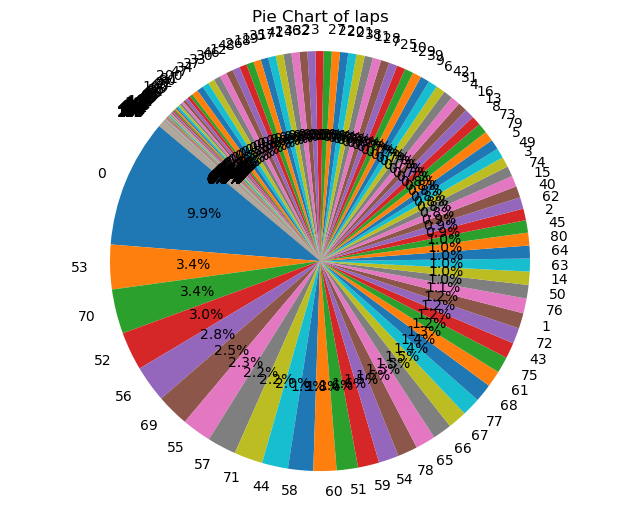

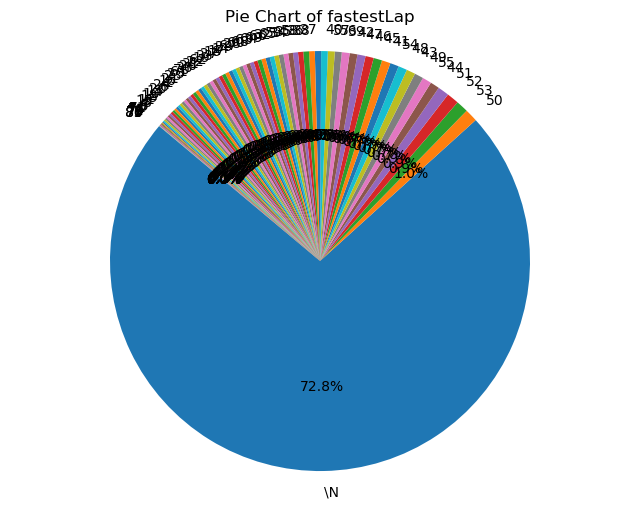

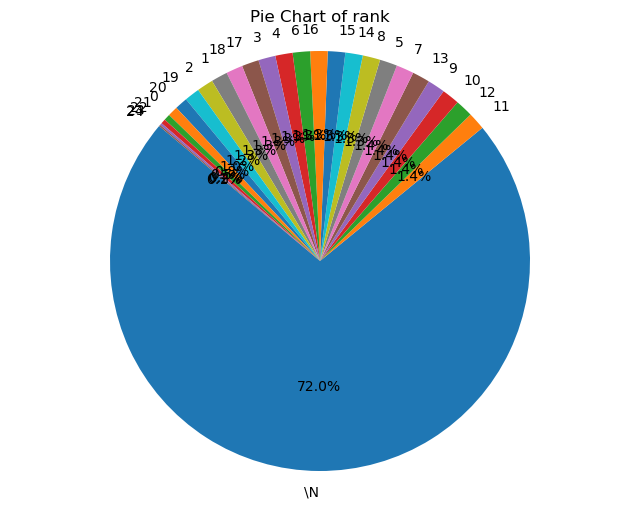

In [235]:
catCols = ['laps', 'fastestLap', 'rank']
for col in catCols:
    plt.figure(figsize=(8, 6))
    value_counts = resultsDF[col].value_counts()
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart of {col}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

<Axes: >

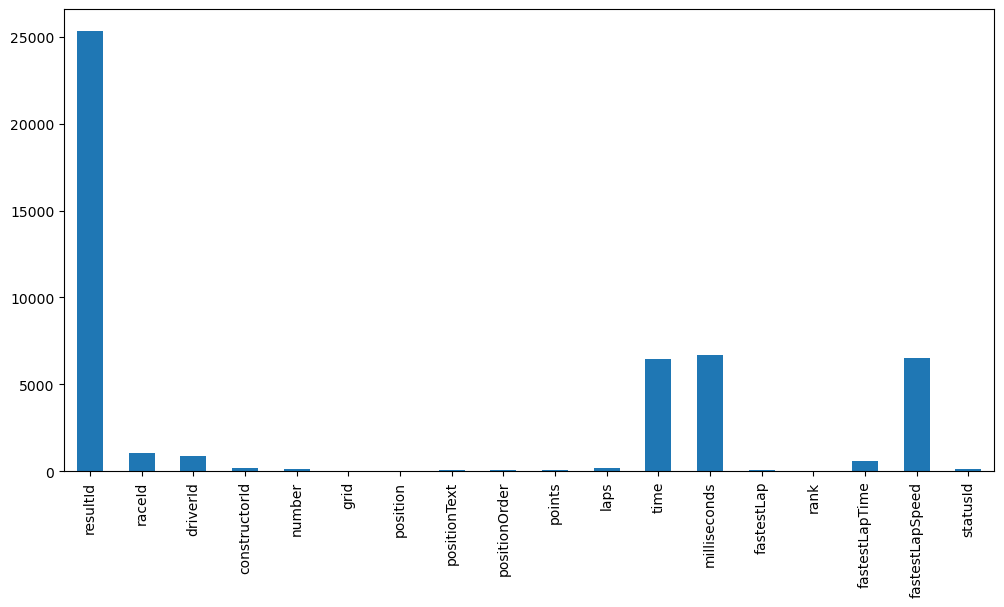

In [236]:
resultsDF.nunique().plot.bar(figsize = (12, 6))

#### Seasons

In [237]:
seasonsDF = pd.read_csv('./f1db_csv_mod/seasons_mod.csv')
seasonsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    73 non-null     int64 
 1   url     73 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [238]:
seasonsDF.head()

year                                                url
0  2009  https://en.wikipedia.org/wiki/2009_Formula_One...
1  2008  https://en.wikipedia.org/wiki/2008_Formula_One...
2  2007  https://en.wikipedia.org/wiki/2007_Formula_One...
3  2006  https://en.wikipedia.org/wiki/2006_Formula_One...
4  2005  https://en.wikipedia.org/wiki/2005_Formula_One...

<Axes: >

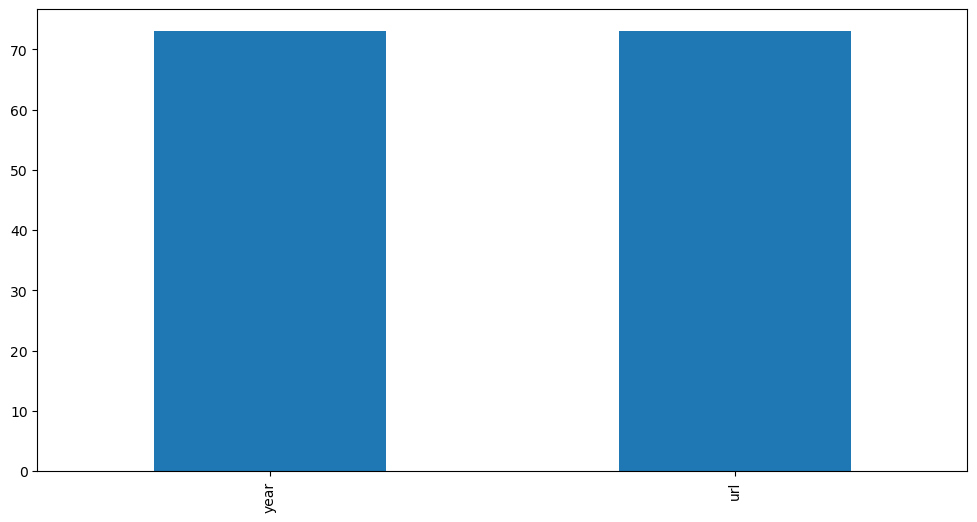

In [239]:
seasonsDF.nunique().plot.bar(figsize = (12, 6))

#### Status

In [240]:
statusDF = pd.read_csv('./f1db_csv_mod/status_mod.csv')
statusDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  137 non-null    int64 
 1   status    137 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [241]:
statusDF.head()

statusId        status
0         1      Finished
1         2  Disqualified
2         3      Accident
3         4     Collision
4         5        Engine

<Axes: >

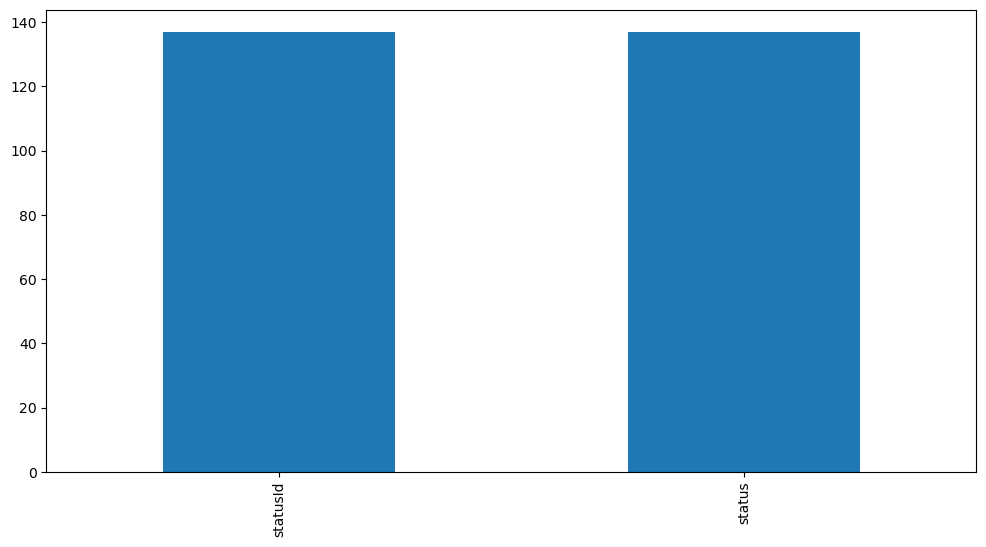

In [242]:
statusDF.nunique().plot.bar(figsize = (12, 6))

### Problem Formulation
The machine learning model will aim to predict the fastest lap time for a race.
Since I am trying to predict a numerical value, it will be a regression problem. I have decided to use the following tables:
- races
- circuits
- results
- driver
- driver_standings
- constructors
- constructor_standings

### Step 2: Data Wrangling on multiple tables 
[Back to report](#report)

Since many tables have duplicate column names, I will drop columns as I merge and rename as I go to avoid confusion

### Merging tables
<a id="mergeData"></a>

##### Races and Circuits

In [243]:
merged_df = pd.merge(racesDF, circuitsDF, on="circuitId", how = "inner")
merged_df.head()

raceId  round  circuitId                 name_x       date      time  \
0       1      1          1  Australian Grand Prix  3/29/2009   6:00:00   
1      18      1          1  Australian Grand Prix  3/16/2008   4:30:00   
2      36      1          1  Australian Grand Prix  3/18/2007   3:00:00   
3      55      3          1  Australian Grand Prix   4/2/2006  14:00:00   
4      71      1          1  Australian Grand Prix   3/6/2005  14:00:00   

                                               url_x   circuitRef  \
0  http://en.wikipedia.org/wiki/2009_Australian_G...  albert_park   
1  http://en.wikipedia.org/wiki/2008_Australian_G...  albert_park   
2  http://en.wikipedia.org/wiki/2007_Australian_G...  albert_park   
3  http://en.wikipedia.org/wiki/2006_Australian_G...  albert_park   
4  http://en.wikipedia.org/wiki/2005_Australian_G...  albert_park   

                           name_y   location    country      lat      lng alt  \
0  Albert Park Grand Prix Circuit  Melbourne  Australia -37.8497  144.968  10   
1  Albert Park Grand Prix Circuit  Melbourne  Australia -37.8497  144.968  10   
2  Albert Park Grand Prix Circuit  Melbourne  Australia -37.8497  144.968  10   
3  Albert Park Grand Prix Circuit  Melbourne  Australia -37.8497  144.968  10   
4  Albert Park Grand Prix Circuit  Melbourne  Australia -37.8497  144.968  10   

                                               url_y  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
2  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
3  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
4  http://en.wikipedia.org/wiki/Melbourne_Grand_P...

In [244]:
merged_df = merged_df.drop(columns = ['name_x', 'time', 'url_x', 'name_y', 'location', 'country', 'lat', 'lng', 'alt', 'url_y'])

In [245]:
merged_df.isnull().mean()

raceId        0.000000
round         0.000000
circuitId     0.000000
date          0.009259
circuitRef    0.000000
dtype: float64

In [246]:
nameMap = {'circuitRef': 'circuitName', 'date':'raceDate'}
merged_df = merged_df.rename(columns = nameMap)

In [247]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 0 to 1079
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1080 non-null   int64 
 1   round        1080 non-null   int64 
 2   circuitId    1080 non-null   int64 
 3   raceDate     1070 non-null   object
 4   circuitName  1080 non-null   object
dtypes: int64(3), object(2)
memory usage: 50.6+ KB


#### Results

In [248]:
merged_df = pd.merge(merged_df, resultsDF, on="raceId", how="inner")
merged_df.head()

raceId  round  circuitId   raceDate  circuitName  resultId  driverId  \
0       1      1          1  3/29/2009  albert_park      7554        18   
1       1      1          1  3/29/2009  albert_park      7555        22   
2       1      1          1  3/29/2009  albert_park      7556        15   
3       1      1          1  3/29/2009  albert_park      7557        10   
4       1      1          1  3/29/2009  albert_park      7558         4   

   constructorId number  grid  ... positionOrder points  laps     time  \
0             23     22     1  ...             1   10.0    58  34:15.8   
1             23     23     2  ...             2    8.0    58    0.807   
2              7      9    20  ...             3    6.0    58    1.604   
3              7     10    19  ...             4    5.0    58    4.435   
4              4      7    10  ...             5    4.0    58    4.879   

   milliseconds fastestLap rank fastestLapTime fastestLapSpeed statusId  
0       5655784         17    3        01:28.0         216.891        1  
1       5656591         43   14        01:29.1         214.344        1  
2       5657388         50   10        01:28.9         214.706        1  
3       5660219         53    6        01:28.4          215.92        1  
4       5660663         53    9        01:28.7         215.199        1  

[5 rows x 22 columns]

In [249]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25329 entries, 0 to 25328
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   raceId           25329 non-null  int64  
 1   round            25329 non-null  int64  
 2   circuitId        25329 non-null  int64  
 3   raceDate         25124 non-null  object 
 4   circuitName      25329 non-null  object 
 5   resultId         25329 non-null  int64  
 6   driverId         25329 non-null  int64  
 7   constructorId    25329 non-null  int64  
 8   number           25329 non-null  object 
 9   grid             25329 non-null  int64  
 10  position         25329 non-null  object 
 11  positionText     25329 non-null  object 
 12  positionOrder    25329 non-null  int64  
 13  points           25329 non-null  float64
 14  laps             25329 non-null  int64  
 15  time             25329 non-null  object 
 16  milliseconds     25329 non-null  object 
 17  fastestLap  

In [250]:
merged_df = merged_df.drop(columns = ['number', 'position', 'positionText', 'points', 'time', 'statusId', 'fastestLap'])
merged_df.head()

raceId  round  circuitId   raceDate  circuitName  resultId  driverId  \
0       1      1          1  3/29/2009  albert_park      7554        18   
1       1      1          1  3/29/2009  albert_park      7555        22   
2       1      1          1  3/29/2009  albert_park      7556        15   
3       1      1          1  3/29/2009  albert_park      7557        10   
4       1      1          1  3/29/2009  albert_park      7558         4   

   constructorId  grid  positionOrder  laps milliseconds rank fastestLapTime  \
0             23     1              1    58      5655784    3        01:28.0   
1             23     2              2    58      5656591   14        01:29.1   
2              7    20              3    58      5657388   10        01:28.9   
3              7    19              4    58      5660219    6        01:28.4   
4              4    10              5    58      5660663    9        01:28.7   

  fastestLapSpeed  
0         216.891  
1         214.344  
2         214.706  
3          215.92  
4         215.199

#### drivers

In [251]:
merged_df = pd.merge(merged_df, driversDF, on="driverId", how = "inner")
merged_df.head()

raceId  round  circuitId   raceDate  circuitName  resultId  driverId  \
0       1      1          1  3/29/2009  albert_park      7554        18   
1      18      1          1  3/16/2008  albert_park        18        18   
2      36      1          1  3/18/2007  albert_park       383        18   
3      55      3          1   4/2/2006  albert_park       796        18   
4      71      1          1   3/6/2005  albert_park      1149        18   

   constructorId  grid  positionOrder  ...  fastestLapTime fastestLapSpeed  \
0             23     1              1  ...         01:28.0         216.891   
1             11    12             18  ...              \N              \N   
2             11    14             15  ...         01:28.4         215.991   
3             11     1             10  ...         01:27.8         217.437   
4             16     8             11  ...         01:26.3         221.316   

  driverRef number code forename surname         dob nationality  \
0    button     22  BUT   Jenson  Button  1980-01-19     British   
1    button     22  BUT   Jenson  Button  1980-01-19     British   
2    button     22  BUT   Jenson  Button  1980-01-19     British   
3    button     22  BUT   Jenson  Button  1980-01-19     British   
4    button     22  BUT   Jenson  Button  1980-01-19     British   

                                          url  
0  http://en.wikipedia.org/wiki/Jenson_Button  
1  http://en.wikipedia.org/wiki/Jenson_Button  
2  http://en.wikipedia.org/wiki/Jenson_Button  
3  http://en.wikipedia.org/wiki/Jenson_Button  
4  http://en.wikipedia.org/wiki/Jenson_Button  

[5 rows x 23 columns]

In [252]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25329 entries, 0 to 25328
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   raceId           25329 non-null  int64 
 1   round            25329 non-null  int64 
 2   circuitId        25329 non-null  int64 
 3   raceDate         25124 non-null  object
 4   circuitName      25329 non-null  object
 5   resultId         25329 non-null  int64 
 6   driverId         25329 non-null  int64 
 7   constructorId    25329 non-null  int64 
 8   grid             25329 non-null  int64 
 9   positionOrder    25329 non-null  int64 
 10  laps             25329 non-null  int64 
 11  milliseconds     25329 non-null  object
 12  rank             25329 non-null  object
 13  fastestLapTime   25329 non-null  object
 14  fastestLapSpeed  25329 non-null  object
 15  driverRef        25329 non-null  object
 16  number           25329 non-null  object
 17  code             25329 non-null

In [253]:
merged_df = merged_df.drop(columns = ['number', 'code', 'forename', 'surname', 'nationality', 'url'])
merged_df.head()

raceId  round  circuitId   raceDate  circuitName  resultId  driverId  \
0       1      1          1  3/29/2009  albert_park      7554        18   
1      18      1          1  3/16/2008  albert_park        18        18   
2      36      1          1  3/18/2007  albert_park       383        18   
3      55      3          1   4/2/2006  albert_park       796        18   
4      71      1          1   3/6/2005  albert_park      1149        18   

   constructorId  grid  positionOrder  laps milliseconds rank fastestLapTime  \
0             23     1              1    58      5655784    3        01:28.0   
1             11    12             18     0           \N   \N             \N   
2             11    14             15    57           \N   17        01:28.4   
3             11     1             10    56           \N    8        01:27.8   
4             16     8             11    56           \N    5        01:26.3   

  fastestLapSpeed driverRef         dob  
0         216.891    button  1980-01-19  
1              \N    button  1980-01-19  
2         215.991    button  1980-01-19  
3         217.437    button  1980-01-19  
4         221.316    button  1980-01-19

#### driver_Standings

In [254]:
merged_df = pd.merge(merged_df, driver_standingsDF, on=["raceId", "driverId"], how = "inner")
merged_df.head()

raceId  round  circuitId   raceDate  circuitName  resultId  driverId  \
0       1      1          1  3/29/2009  albert_park      7554        18   
1      36      1          1  3/18/2007  albert_park       383        18   
2      55      3          1   4/2/2006  albert_park       796        18   
3      90      1          1   3/7/2004  albert_park      1520        18   
4     108      1          1   3/9/2003  albert_park      1884        18   

   constructorId  grid  positionOrder  ...  rank fastestLapTime  \
0             23     1              1  ...     3        01:28.0   
1             11    14             15  ...    17        01:28.4   
2             11     1             10  ...     8        01:27.8   
3             16     4              6  ...     7        01:26.0   
4             16     8             10  ...    \N             \N   

  fastestLapSpeed driverRef         dob driverStandingsId points  position  \
0         216.891    button  1980-01-19              8247     10         1   
1         215.991    button  1980-01-19             13627      0        15   
2         217.437    button  1980-01-19             12849     11         5   
3         222.032    button  1980-01-19             12427      3         6   
4              \N    button  1980-01-19             12117      0        10   

  positionText  wins  
0            1     1  
1           15     0  
2            5     0  
3            6     0  
4           10     0  

[5 rows x 22 columns]

In [255]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24848 entries, 0 to 24847
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   raceId             24848 non-null  int64 
 1   round              24848 non-null  int64 
 2   circuitId          24848 non-null  int64 
 3   raceDate           24643 non-null  object
 4   circuitName        24848 non-null  object
 5   resultId           24848 non-null  int64 
 6   driverId           24848 non-null  int64 
 7   constructorId      24848 non-null  int64 
 8   grid               24848 non-null  int64 
 9   positionOrder      24848 non-null  int64 
 10  laps               24848 non-null  int64 
 11  milliseconds       24848 non-null  object
 12  rank               24848 non-null  object
 13  fastestLapTime     24848 non-null  object
 14  fastestLapSpeed    24848 non-null  object
 15  driverRef          24848 non-null  object
 16  dob                24848 non-null  objec

In [256]:
merged_df = merged_df.drop(columns = ['driverStandingsId', 'position', 'positionText'])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24848 entries, 0 to 24847
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   raceId           24848 non-null  int64 
 1   round            24848 non-null  int64 
 2   circuitId        24848 non-null  int64 
 3   raceDate         24643 non-null  object
 4   circuitName      24848 non-null  object
 5   resultId         24848 non-null  int64 
 6   driverId         24848 non-null  int64 
 7   constructorId    24848 non-null  int64 
 8   grid             24848 non-null  int64 
 9   positionOrder    24848 non-null  int64 
 10  laps             24848 non-null  int64 
 11  milliseconds     24848 non-null  object
 12  rank             24848 non-null  object
 13  fastestLapTime   24848 non-null  object
 14  fastestLapSpeed  24848 non-null  object
 15  driverRef        24848 non-null  object
 16  dob              24848 non-null  object
 17  points           24843 non-null

In [257]:
nameMap = {'points': 'driverSeasonPoints', 'wins': 'driverWins'}
merged_df = merged_df.rename(columns = nameMap)

#### constructors

In [258]:
merged_df = pd.merge(merged_df, constructsDF, on="constructorId", how = "inner")
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24848 entries, 0 to 24847
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   raceId              24848 non-null  int64 
 1   round               24848 non-null  int64 
 2   circuitId           24848 non-null  int64 
 3   raceDate            24643 non-null  object
 4   circuitName         24848 non-null  object
 5   resultId            24848 non-null  int64 
 6   driverId            24848 non-null  int64 
 7   constructorId       24848 non-null  int64 
 8   grid                24848 non-null  int64 
 9   positionOrder       24848 non-null  int64 
 10  laps                24848 non-null  int64 
 11  milliseconds        24848 non-null  object
 12  rank                24848 non-null  object
 13  fastestLapTime      24848 non-null  object
 14  fastestLapSpeed     24848 non-null  object
 15  driverRef           24848 non-null  object
 16  dob                 24

In [259]:
merged_df = merged_df.drop(columns = ['name', 'nationality', 'url'])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24848 entries, 0 to 24847
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   raceId              24848 non-null  int64 
 1   round               24848 non-null  int64 
 2   circuitId           24848 non-null  int64 
 3   raceDate            24643 non-null  object
 4   circuitName         24848 non-null  object
 5   resultId            24848 non-null  int64 
 6   driverId            24848 non-null  int64 
 7   constructorId       24848 non-null  int64 
 8   grid                24848 non-null  int64 
 9   positionOrder       24848 non-null  int64 
 10  laps                24848 non-null  int64 
 11  milliseconds        24848 non-null  object
 12  rank                24848 non-null  object
 13  fastestLapTime      24848 non-null  object
 14  fastestLapSpeed     24848 non-null  object
 15  driverRef           24848 non-null  object
 16  dob                 24

#### constructors_standings

In [260]:
merged_df = pd.merge(merged_df, construct_standingsDF, on=["raceId", "constructorId"])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23176 entries, 0 to 23175
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   raceId                  23176 non-null  int64  
 1   round                   23176 non-null  int64  
 2   circuitId               23176 non-null  int64  
 3   raceDate                22971 non-null  object 
 4   circuitName             23176 non-null  object 
 5   resultId                23176 non-null  int64  
 6   driverId                23176 non-null  int64  
 7   constructorId           23176 non-null  int64  
 8   grid                    23176 non-null  int64  
 9   positionOrder           23176 non-null  int64  
 10  laps                    23176 non-null  int64  
 11  milliseconds            23176 non-null  object 
 12  rank                    23176 non-null  object 
 13  fastestLapTime          23176 non-null  object 
 14  fastestLapSpeed         23176 non-null

In [261]:
merged_df = merged_df.drop(columns = ['constructorStandingsId', 'position', 'positionText'])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23176 entries, 0 to 23175
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   raceId              23176 non-null  int64  
 1   round               23176 non-null  int64  
 2   circuitId           23176 non-null  int64  
 3   raceDate            22971 non-null  object 
 4   circuitName         23176 non-null  object 
 5   resultId            23176 non-null  int64  
 6   driverId            23176 non-null  int64  
 7   constructorId       23176 non-null  int64  
 8   grid                23176 non-null  int64  
 9   positionOrder       23176 non-null  int64  
 10  laps                23176 non-null  int64  
 11  milliseconds        23176 non-null  object 
 12  rank                23176 non-null  object 
 13  fastestLapTime      23176 non-null  object 
 14  fastestLapSpeed     23176 non-null  object 
 15  driverRef           23176 non-null  object 
 16  dob 

In [262]:
nameMap = {'points': 'constructSeasonPoints', 'wins': 'constructWins'}
merged_df = merged_df.rename(columns = nameMap)

In [263]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23176 entries, 0 to 23175
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   raceId                 23176 non-null  int64  
 1   round                  23176 non-null  int64  
 2   circuitId              23176 non-null  int64  
 3   raceDate               22971 non-null  object 
 4   circuitName            23176 non-null  object 
 5   resultId               23176 non-null  int64  
 6   driverId               23176 non-null  int64  
 7   constructorId          23176 non-null  int64  
 8   grid                   23176 non-null  int64  
 9   positionOrder          23176 non-null  int64  
 10  laps                   23176 non-null  int64  
 11  milliseconds           23176 non-null  object 
 12  rank                   23176 non-null  object 
 13  fastestLapTime         23176 non-null  object 
 14  fastestLapSpeed        23176 non-null  object 
 15  dr

In [264]:
#dropping remnant Id columns
merged_df = merged_df.drop(columns = ['raceId', 'round', 'circuitId', 'resultId', 'driverId', 'constructorId'])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23176 entries, 0 to 23175
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   raceDate               22971 non-null  object 
 1   circuitName            23176 non-null  object 
 2   grid                   23176 non-null  int64  
 3   positionOrder          23176 non-null  int64  
 4   laps                   23176 non-null  int64  
 5   milliseconds           23176 non-null  object 
 6   rank                   23176 non-null  object 
 7   fastestLapTime         23176 non-null  object 
 8   fastestLapSpeed        23176 non-null  object 
 9   driverRef              23176 non-null  object 
 10  dob                    23176 non-null  object 
 11  driverSeasonPoints     23171 non-null  object 
 12  driverWins             23176 non-null  int64  
 13  constructorRef         23176 non-null  object 
 14  constructSeasonPoints  23176 non-null  float64
 15  co

In [265]:
#replacing null values with proper nulls
merged_df.replace("\\N", pd.NA, inplace=True)

In [266]:
merged_df.isnull().mean()

raceDate                 0.008845
circuitName              0.000000
grid                     0.000000
positionOrder            0.000000
laps                     0.000000
milliseconds             0.721609
rank                     0.697187
fastestLapTime           0.705514
fastestLapSpeed          0.705514
driverRef                0.000000
dob                      0.000000
driverSeasonPoints       0.000216
driverWins               0.000000
constructorRef           0.000000
constructSeasonPoints    0.000000
constructWins            0.000000
dtype: float64

In [267]:
#here i drop the rows with null values for my target variable as they r useless
merged_df = merged_df.dropna(subset=['fastestLapTime'])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 18145
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   raceDate               6630 non-null   object 
 1   circuitName            6825 non-null   object 
 2   grid                   6825 non-null   int64  
 3   positionOrder          6825 non-null   int64  
 4   laps                   6825 non-null   int64  
 5   milliseconds           3333 non-null   object 
 6   rank                   6825 non-null   object 
 7   fastestLapTime         6825 non-null   object 
 8   fastestLapSpeed        6825 non-null   object 
 9   driverRef              6825 non-null   object 
 10  dob                    6825 non-null   object 
 11  driverSeasonPoints     6820 non-null   object 
 12  driverWins             6825 non-null   int64  
 13  constructorRef         6825 non-null   object 
 14  constructSeasonPoints  6825 non-null   float64
 15  con

### Making new features
<a id="extractFeat"></a>
[Back to report](#report)

First I will make driver age, then average lap time after imputation

#### Driver age
<a id="driverAge"></a>

In [268]:
# we can see here that some dates have their years increased by an additional 10 thousand
# in the following cells i will fix it
merged_df.head()

raceDate  circuitName  grid  positionOrder  laps milliseconds rank  \
0  3/29/2009  albert_park     1              1    58      5655784    3   
1  3/29/2009  albert_park     2              2    58      5656591   14   
2  4/5/12009       sepang     1              1    31      4252092    1   
3  4/5/12009       sepang     8              5    31      4299452    2   
4  4/19/2009     shanghai     5              3    56      7108460    6   

  fastestLapTime fastestLapSpeed    driverRef         dob driverSeasonPoints  \
0        01:28.0         216.891       button  1980-01-19                 10   
1        01:29.1         214.344  barrichello  1972-05-23                  8   
2        01:36.6         206.483       button  1980-01-19                 15   
3        01:37.5         204.698  barrichello  1972-05-23                 10   
4        01:53.5         172.825       button  1980-01-19                 21   

   driverWins constructorRef  constructSeasonPoints  constructWins  
0           1          brawn                   18.0              1  
1           0          brawn                   18.0              1  
2           2          brawn                   25.0              2  
3           0          brawn                   25.0              2  
4           2          brawn                   36.0              2

In [269]:
# there are also some null values in the year column so i will remove them
merged_df.isnull().mean()

raceDate                 0.028571
circuitName              0.000000
grid                     0.000000
positionOrder            0.000000
laps                     0.000000
milliseconds             0.511648
rank                     0.000000
fastestLapTime           0.000000
fastestLapSpeed          0.000000
driverRef                0.000000
dob                      0.000000
driverSeasonPoints       0.000733
driverWins               0.000000
constructorRef           0.000000
constructSeasonPoints    0.000000
constructWins            0.000000
dtype: float64

In [270]:
merged_df = merged_df.dropna(subset = ['raceDate'])

In [271]:
# create new columns named month, day and year with values based off the raceDate after splitting
merged_df[['Month', 'Day', 'Year']] = merged_df['raceDate'].str.split('/', expand=True)

# changing year to integer type for calculation later
merged_df['Year'] = merged_df['Year'].astype(int)

In [272]:
def fix_year(year):
    if year > 2023:
        year -= 10000
    return year

merged_df['Year'] = merged_df['Year'].apply(fix_year)
merged_df['Year'] = merged_df['Year'].astype(str)


merged_df['raceDate'] = merged_df['Month'] + "/" + merged_df['Day'] + "/" + merged_df['Year']
merged_df = merged_df.drop(columns = ['Month', 'Day','Year'])

In [273]:
merged_df.head()

raceDate  circuitName  grid  positionOrder  laps milliseconds rank  \
0  3/29/2009  albert_park     1              1    58      5655784    3   
1  3/29/2009  albert_park     2              2    58      5656591   14   
2   4/5/2009       sepang     1              1    31      4252092    1   
3   4/5/2009       sepang     8              5    31      4299452    2   
4  4/19/2009     shanghai     5              3    56      7108460    6   

  fastestLapTime fastestLapSpeed    driverRef         dob driverSeasonPoints  \
0        01:28.0         216.891       button  1980-01-19                 10   
1        01:29.1         214.344  barrichello  1972-05-23                  8   
2        01:36.6         206.483       button  1980-01-19                 15   
3        01:37.5         204.698  barrichello  1972-05-23                 10   
4        01:53.5         172.825       button  1980-01-19                 21   

   driverWins constructorRef  constructSeasonPoints  constructWins  
0           1          brawn                   18.0              1  
1           0          brawn                   18.0              1  
2           2          brawn                   25.0              2  
3           0          brawn                   25.0              2  
4           2          brawn                   36.0              2

In [274]:
#making new features

#first feature to make is the age of the driver. the second feature to make is averageLapTime which will be made after imputation
#converting column to datetime
merged_df['dob'] = pd.to_datetime(merged_df['dob'])
merged_df['raceDate'] = pd.to_datetime(merged_df['raceDate'])

merged_df['driverAge'] = (merged_df['raceDate'] - merged_df['dob']).dt.days // 365
merged_df = merged_df.drop(columns = ['raceDate'])

merged_df.head()

circuitName  grid  positionOrder  laps milliseconds rank fastestLapTime  \
0  albert_park     1              1    58      5655784    3        01:28.0   
1  albert_park     2              2    58      5656591   14        01:29.1   
2       sepang     1              1    31      4252092    1        01:36.6   
3       sepang     8              5    31      4299452    2        01:37.5   
4     shanghai     5              3    56      7108460    6        01:53.5   

  fastestLapSpeed    driverRef        dob driverSeasonPoints  driverWins  \
0         216.891       button 1980-01-19                 10           1   
1         214.344  barrichello 1972-05-23                  8           0   
2         206.483       button 1980-01-19                 15           2   
3         204.698  barrichello 1972-05-23                 10           0   
4         172.825       button 1980-01-19                 21           2   

  constructorRef  constructSeasonPoints  constructWins  driverAge  
0          brawn                   18.0              1         29  
1          brawn                   18.0              1         36  
2          brawn                   25.0              2         29  
3          brawn                   25.0              2         36  
4          brawn                   36.0              2         29

In [275]:
df = merged_df.copy()

#### avgLapTime pt.1
[Back to report](#report)
<a id="avgLapTime"></a>

###### The averageLapTime column will involve the milliseconds column and laps. However, the milliseconds column contains data from the target variable. This means I will have to convert fastestLapTime to milliseconds, minus it away from the milliseconds column, and finally minus 1 from laps.
I will also have to calculate it after handling nulls as milliseconds contains nulls

In [276]:
df['milliseconds'] = pd.to_numeric(df['milliseconds'])
df['fastestLapSpeed'] = pd.to_numeric(df['fastestLapSpeed'])

In [277]:
df.isnull().mean()

circuitName              0.000000
grid                     0.000000
positionOrder            0.000000
laps                     0.000000
milliseconds             0.513876
rank                     0.000000
fastestLapTime           0.000000
fastestLapSpeed          0.000000
driverRef                0.000000
dob                      0.000000
driverSeasonPoints       0.000754
driverWins               0.000000
constructorRef           0.000000
constructSeasonPoints    0.000000
constructWins            0.000000
driverAge                0.000000
dtype: float64

In [278]:
# i need to convert fastestLapTime to milliseconds first
df[['Minutes', 'Seconds']] = df['fastestLapTime'].str.split(':', expand=True)
df['Minutes'] = pd.to_numeric(df['Minutes'])
df['Seconds'] = pd.to_numeric(df['Seconds'])
df['fastestLapTime'] = (df['Minutes'] * 60000 + df['Seconds'] * 1000)

# dropping columns used for calculation
df = df.drop(columns = ['Minutes', 'Seconds', 'dob'])
df.head()

circuitName  grid  positionOrder  laps  milliseconds rank  fastestLapTime  \
0  albert_park     1              1    58     5655784.0    3         88000.0   
1  albert_park     2              2    58     5656591.0   14         89100.0   
2       sepang     1              1    31     4252092.0    1         96600.0   
3       sepang     8              5    31     4299452.0    2         97500.0   
4     shanghai     5              3    56     7108460.0    6        113500.0   

   fastestLapSpeed    driverRef driverSeasonPoints  driverWins constructorRef  \
0          216.891       button                 10           1          brawn   
1          214.344  barrichello                  8           0          brawn   
2          206.483       button                 15           2          brawn   
3          204.698  barrichello                 10           0          brawn   
4          172.825       button                 21           2          brawn   

   constructSeasonPoints  constructWins  driverAge  
0                   18.0              1         29  
1                   18.0              1         36  
2                   25.0              2         29  
3                   25.0              2         36  
4                   36.0              2         29

In [279]:
# now i will start subtracting
df['milliseconds'] = df['milliseconds'] - df['fastestLapTime']
df['laps'] -=1 

In [280]:
df.head()

circuitName  grid  positionOrder  laps  milliseconds rank  fastestLapTime  \
0  albert_park     1              1    57     5567784.0    3         88000.0   
1  albert_park     2              2    57     5567491.0   14         89100.0   
2       sepang     1              1    30     4155492.0    1         96600.0   
3       sepang     8              5    30     4201952.0    2         97500.0   
4     shanghai     5              3    55     6994960.0    6        113500.0   

   fastestLapSpeed    driverRef driverSeasonPoints  driverWins constructorRef  \
0          216.891       button                 10           1          brawn   
1          214.344  barrichello                  8           0          brawn   
2          206.483       button                 15           2          brawn   
3          204.698  barrichello                 10           0          brawn   
4          172.825       button                 21           2          brawn   

   constructSeasonPoints  constructWins  driverAge  
0                   18.0              1         29  
1                   18.0              1         36  
2                   25.0              2         29  
3                   25.0              2         36  
4                   36.0              2         29

### Step 3: Data Cleansing and Transformation

### Outliers removal/capping for laps
[Back to report](#report)
<a id="avgLapTimeCleansing"></a>

There is alot of null values in milliseconds. However, dropping all the null values is equivalent to losing half my data. Therefore I needed to find ways to reduce the amount of null values. Since I plan on using mean imputation, and milliseconds is strongly affected by laps, I need to ensure that I weed out the outlier laps since they will strongly affect my imputation.

In [281]:
# check which columns have missing values
df.isnull().mean()

circuitName              0.000000
grid                     0.000000
positionOrder            0.000000
laps                     0.000000
milliseconds             0.513876
rank                     0.000000
fastestLapTime           0.000000
fastestLapSpeed          0.000000
driverRef                0.000000
driverSeasonPoints       0.000754
driverWins               0.000000
constructorRef           0.000000
constructSeasonPoints    0.000000
constructWins            0.000000
driverAge                0.000000
dtype: float64

<Axes: ylabel='laps'>

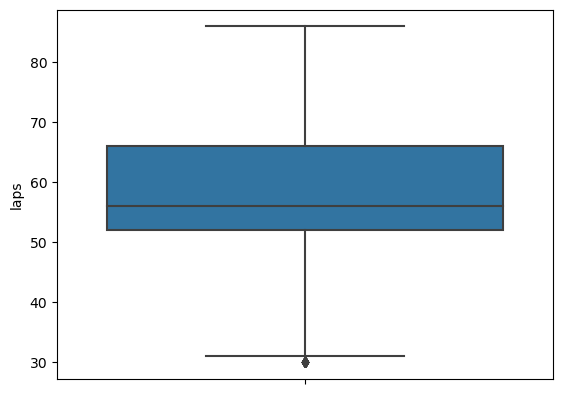

In [282]:
#here i remove all the values that fall outside the lower bound.
Q1 = df['laps'].quantile(0.25)
Q3 = df['laps'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
df = df[(df['laps'] >= lower_bound)]

sns.boxplot(y=df['laps'])

In [283]:
df.isnull().mean()

circuitName              0.000000
grid                     0.000000
positionOrder            0.000000
laps                     0.000000
milliseconds             0.469115
rank                     0.000000
fastestLapTime           0.000000
fastestLapSpeed          0.000000
driverRef                0.000000
driverSeasonPoints       0.000824
driverWins               0.000000
constructorRef           0.000000
constructSeasonPoints    0.000000
constructWins            0.000000
driverAge                0.000000
dtype: float64

Now I will remove 80% of the rows with missing values as milliseconds

In [284]:
nan_indices = df.index[df['milliseconds'].isna()]
df = df.drop(nan_indices[:int(len(nan_indices) * 0.8)])

In [285]:
df.isnull().mean()

circuitName              0.000000
grid                     0.000000
positionOrder            0.000000
laps                     0.000000
milliseconds             0.150277
rank                     0.000000
fastestLapTime           0.000000
fastestLapSpeed          0.000000
driverRef                0.000000
driverSeasonPoints       0.000527
driverWins               0.000000
constructorRef           0.000000
constructSeasonPoints    0.000000
constructWins            0.000000
driverAge                0.000000
dtype: float64

In [286]:
df.head()

circuitName  grid  positionOrder  laps  milliseconds rank  fastestLapTime  \
0  albert_park     1              1    57     5567784.0    3         88000.0   
1  albert_park     2              2    57     5567491.0   14         89100.0   
2       sepang     1              1    30     4155492.0    1         96600.0   
3       sepang     8              5    30     4201952.0    2         97500.0   
4     shanghai     5              3    55     6994960.0    6        113500.0   

   fastestLapSpeed    driverRef driverSeasonPoints  driverWins constructorRef  \
0          216.891       button                 10           1          brawn   
1          214.344  barrichello                  8           0          brawn   
2          206.483       button                 15           2          brawn   
3          204.698  barrichello                 10           0          brawn   
4          172.825       button                 21           2          brawn   

   constructSeasonPoints  constructWins  driverAge  
0                   18.0              1         29  
1                   18.0              1         36  
2                   25.0              2         29  
3                   25.0              2         36  
4                   36.0              2         29

### Train test split
<a id="trainTest"></a>
[Back to report](#report)

Before splitting, I will make sure all my dtypes are correct

In [287]:
df.dtypes

circuitName               object
grid                       int64
positionOrder              int64
laps                       int64
milliseconds             float64
rank                      object
fastestLapTime           float64
fastestLapSpeed          float64
driverRef                 object
driverSeasonPoints        object
driverWins                 int64
constructorRef            object
constructSeasonPoints    float64
constructWins              int64
driverAge                  int64
dtype: object

In [288]:
df['rank'] = pd.to_numeric(df['rank'])
df['driverSeasonPoints'] = pd.to_numeric(df['rank'])

In [289]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('fastestLapTime', axis=1), df['fastestLapTime'], test_size=0.3, random_state=0)

### Missing value imputation
<a id="imputation"></a>
[Back to report](#report)

In [290]:
df.isnull().mean()

circuitName              0.000000
grid                     0.000000
positionOrder            0.000000
laps                     0.000000
milliseconds             0.150277
rank                     0.000000
fastestLapTime           0.000000
fastestLapSpeed          0.000000
driverRef                0.000000
driverSeasonPoints       0.000000
driverWins               0.000000
constructorRef           0.000000
constructSeasonPoints    0.000000
constructWins            0.000000
driverAge                0.000000
dtype: float64

In [291]:
X_test.head()

circuitName  grid  positionOrder  laps  milliseconds  rank  \
17889    rodriguez    22             20    69           NaN     8   
3650   magny_cours     9              9    69     5445705.0     9   
4261      shanghai    13              8    55     5722072.0     4   
544     marina_bay     3              2    60     7039994.0     1   
10410        monza    15              8    52     4471279.0     4   

       fastestLapSpeed   driverRef  driverSeasonPoints  driverWins  \
17889          186.056    grosjean                   8           0   
3650           206.199     rosberg                   9           0   
4261           195.294   maldonado                   4           0   
544            168.392      button                   1           2   
10410          252.433  fisichella                   4           0   

      constructorRef  constructSeasonPoints  constructWins  driverAge  
17889           haas                   29.0              0         30  
3650        williams                   13.0              0         22  
4261        williams                   18.0              0         27  
544          mclaren                  353.0              4         31  
10410         sauber                   29.0              0         31

In [292]:
X_train['fastestLapSpeed'] = pd.to_numeric(X_train['fastestLapSpeed'])
X_test['fastestLapSpeed'] = pd.to_numeric(X_test['fastestLapSpeed'])

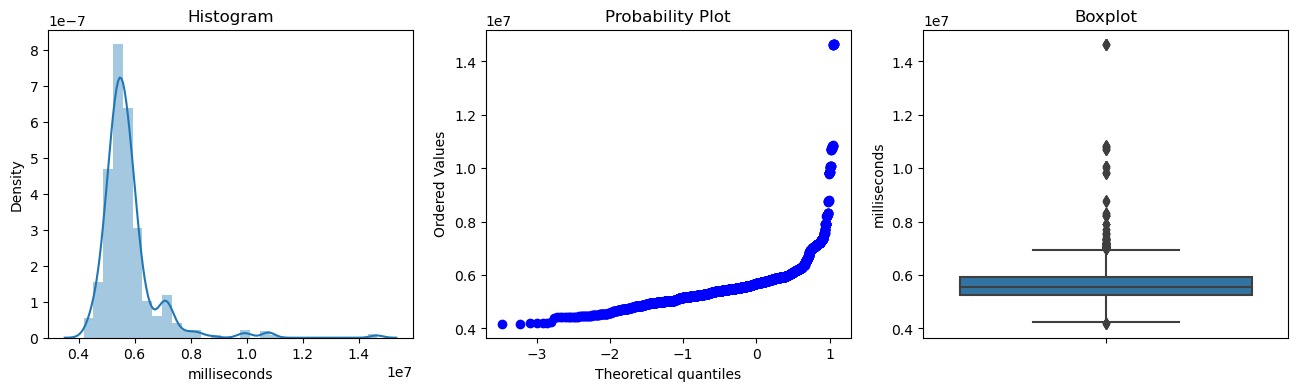

In [293]:
# checking distribution of milliseconds
diagnostic_plots(X_train, 'milliseconds')

## Median Imputation test

In [294]:
Trainmedian = X_train['milliseconds'].median()
Testmedian = X_test['milliseconds'].median()

X_train_med = X_train.copy()
X_test_med = X_test.copy()

X_train_med['milliseconds'] = X_train['milliseconds'].fillna(Trainmedian)
X_test_med['milliseconds'] = X_test['milliseconds'].fillna(Testmedian)

X_train_med.isnull().mean()

circuitName              0.0
grid                     0.0
positionOrder            0.0
laps                     0.0
milliseconds             0.0
rank                     0.0
fastestLapSpeed          0.0
driverRef                0.0
driverSeasonPoints       0.0
driverWins               0.0
constructorRef           0.0
constructSeasonPoints    0.0
constructWins            0.0
driverAge                0.0
dtype: float64

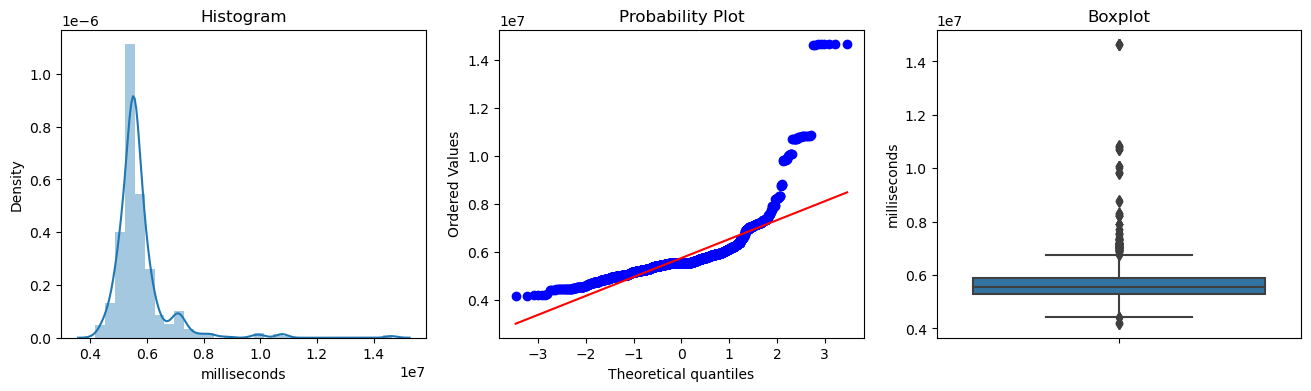

In [295]:
# checking distribution of milliseconds
diagnostic_plots(X_train_med, 'milliseconds')

In [296]:
X_train.head()

circuitName  grid  positionOrder  laps  milliseconds  rank  \
9622     silverstone    17              9    51     4845272.0    12   
10033    hungaroring    10             11    68     6036686.0    15   
11535         jeddah     3              2    49     7495443.0     3   
12695     interlagos    23             18    68           NaN    20   
6115   red_bull_ring    10              5    70     5023887.0     2   

       fastestLapSpeed       driverRef  driverSeasonPoints  driverWins  \
9622           235.875           kvyat                  12           0   
10033          183.235      hulkenberg                  15           0   
11535          242.943  max_verstappen                   3           9   
12695          190.233     karthikeyan                  20           0   
6115           229.402           sainz                   2           0   

      constructorRef  constructSeasonPoints  constructWins  driverAge  
9622      toro_rosso                   19.0              0         25  
10033    force_india                   46.0              0         24  
11535       red_bull                  559.5             10         24  
12695            hrt                    0.0              0         35  
6115         ferrari                  122.0              0         26

## Mean Imputation

In [297]:
Trainmean = X_train['milliseconds'].mean()
Testmean = X_test['milliseconds'].mean()

X_train['milliseconds'] = X_train['milliseconds'].fillna(Trainmean)
X_test['milliseconds'] = X_test['milliseconds'].fillna(Testmean)

X_train.isnull().mean()

circuitName              0.0
grid                     0.0
positionOrder            0.0
laps                     0.0
milliseconds             0.0
rank                     0.0
fastestLapSpeed          0.0
driverRef                0.0
driverSeasonPoints       0.0
driverWins               0.0
constructorRef           0.0
constructSeasonPoints    0.0
constructWins            0.0
driverAge                0.0
dtype: float64

In [298]:
X_train.head()

circuitName  grid  positionOrder  laps  milliseconds  rank  \
9622     silverstone    17              9    51  4.845272e+06    12   
10033    hungaroring    10             11    68  6.036686e+06    15   
11535         jeddah     3              2    49  7.495443e+06     3   
12695     interlagos    23             18    68  5.771754e+06    20   
6115   red_bull_ring    10              5    70  5.023887e+06     2   

       fastestLapSpeed       driverRef  driverSeasonPoints  driverWins  \
9622           235.875           kvyat                  12           0   
10033          183.235      hulkenberg                  15           0   
11535          242.943  max_verstappen                   3           9   
12695          190.233     karthikeyan                  20           0   
6115           229.402           sainz                   2           0   

      constructorRef  constructSeasonPoints  constructWins  driverAge  
9622      toro_rosso                   19.0              0         25  
10033    force_india                   46.0              0         24  
11535       red_bull                  559.5             10         24  
12695            hrt                    0.0              0         35  
6115         ferrari                  122.0              0         26

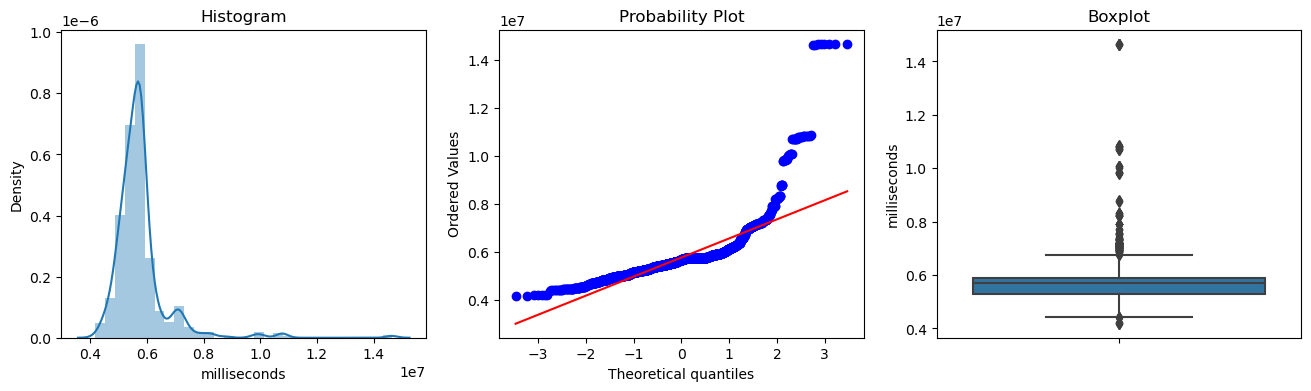

In [299]:
# checking distribution of milliseconds
diagnostic_plots(X_train, 'milliseconds')

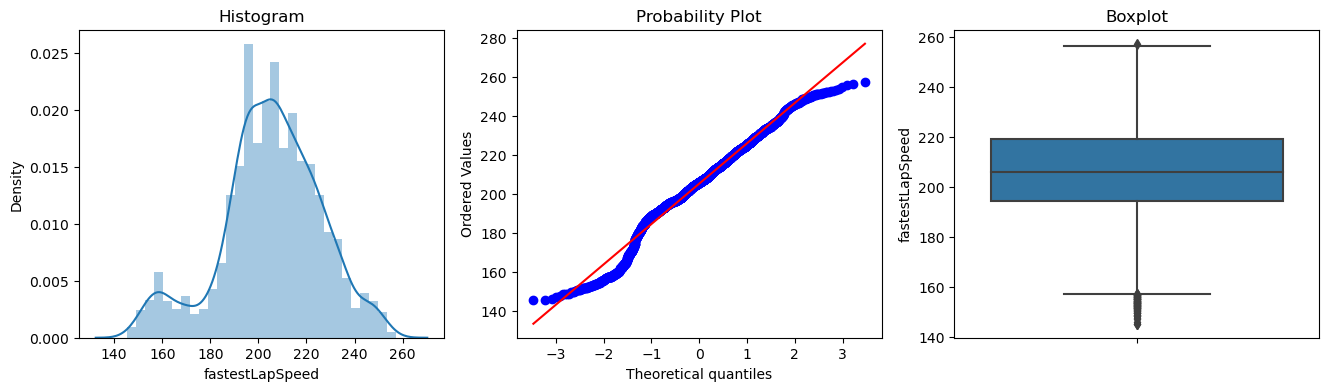

In [300]:
diagnostic_plots(X_train, 'fastestLapSpeed')

#### avgLapTime pt.2
<a id="avgLapTime2"></a>
[Back to report](#report)

In [301]:
# second feature to make is the average lap time
X_train["avgLapTime"] = X_train["milliseconds"] / X_train["laps"]
X_train.head()

circuitName  grid  positionOrder  laps  milliseconds  rank  \
9622     silverstone    17              9    51  4.845272e+06    12   
10033    hungaroring    10             11    68  6.036686e+06    15   
11535         jeddah     3              2    49  7.495443e+06     3   
12695     interlagos    23             18    68  5.771754e+06    20   
6115   red_bull_ring    10              5    70  5.023887e+06     2   

       fastestLapSpeed       driverRef  driverSeasonPoints  driverWins  \
9622           235.875           kvyat                  12           0   
10033          183.235      hulkenberg                  15           0   
11535          242.943  max_verstappen                   3           9   
12695          190.233     karthikeyan                  20           0   
6115           229.402           sainz                   2           0   

      constructorRef  constructSeasonPoints  constructWins  driverAge  \
9622      toro_rosso                   19.0              0         25   
10033    force_india                   46.0              0         24   
11535       red_bull                  559.5             10         24   
12695            hrt                    0.0              0         35   
6115         ferrari                  122.0              0         26   

          avgLapTime  
9622    95005.333333  
10033   88774.794118  
11535  152968.224490  
12695   84878.731187  
6115    71769.814286

In [302]:
X_test["laps"] = pd.to_numeric(X_test["laps"])
X_test["avgLapTime"] = X_test["milliseconds"] / X_test["laps"]
X_test.head()

circuitName  grid  positionOrder  laps  milliseconds  rank  \
17889    rodriguez    22             20    69  5.823557e+06     8   
3650   magny_cours     9              9    69  5.445705e+06     9   
4261      shanghai    13              8    55  5.722072e+06     4   
544     marina_bay     3              2    60  7.039994e+06     1   
10410        monza    15              8    52  4.471279e+06     4   

       fastestLapSpeed   driverRef  driverSeasonPoints  driverWins  \
17889          186.056    grosjean                   8           0   
3650           206.199     rosberg                   9           0   
4261           195.294   maldonado                   4           0   
544            168.392      button                   1           2   
10410          252.433  fisichella                   4           0   

      constructorRef  constructSeasonPoints  constructWins  driverAge  \
17889           haas                   29.0              0         30   
3650        williams                   13.0              0         22   
4261        williams                   18.0              0         27   
544          mclaren                  353.0              4         31   
10410         sauber                   29.0              0         31   

          avgLapTime  
17889   84399.380872  
3650    78923.260870  
4261   104037.672727  
544    117333.233333  
10410   85986.134615

In [303]:
X_train = X_train.drop(columns = ['laps'])
X_test = X_test.drop(columns = ['laps'])

In [304]:
X_train.isnull().mean()

circuitName              0.0
grid                     0.0
positionOrder            0.0
milliseconds             0.0
rank                     0.0
fastestLapSpeed          0.0
driverRef                0.0
driverSeasonPoints       0.0
driverWins               0.0
constructorRef           0.0
constructSeasonPoints    0.0
constructWins            0.0
driverAge                0.0
avgLapTime               0.0
dtype: float64

In [305]:
X_train.head()

circuitName  grid  positionOrder  milliseconds  rank  \
9622     silverstone    17              9  4.845272e+06    12   
10033    hungaroring    10             11  6.036686e+06    15   
11535         jeddah     3              2  7.495443e+06     3   
12695     interlagos    23             18  5.771754e+06    20   
6115   red_bull_ring    10              5  5.023887e+06     2   

       fastestLapSpeed       driverRef  driverSeasonPoints  driverWins  \
9622           235.875           kvyat                  12           0   
10033          183.235      hulkenberg                  15           0   
11535          242.943  max_verstappen                   3           9   
12695          190.233     karthikeyan                  20           0   
6115           229.402           sainz                   2           0   

      constructorRef  constructSeasonPoints  constructWins  driverAge  \
9622      toro_rosso                   19.0              0         25   
10033    force_india                   46.0              0         24   
11535       red_bull                  559.5             10         24   
12695            hrt                    0.0              0         35   
6115         ferrari                  122.0              0         26   

          avgLapTime  
9622    95005.333333  
10033   88774.794118  
11535  152968.224490  
12695   84878.731187  
6115    71769.814286

### Outlier Handling
<a id="outliers"></a>
[Back to report](#report)

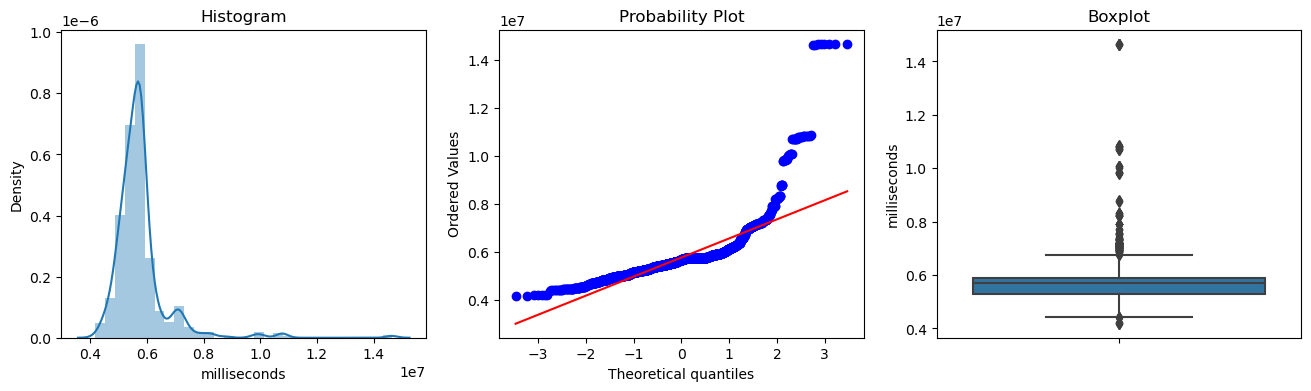

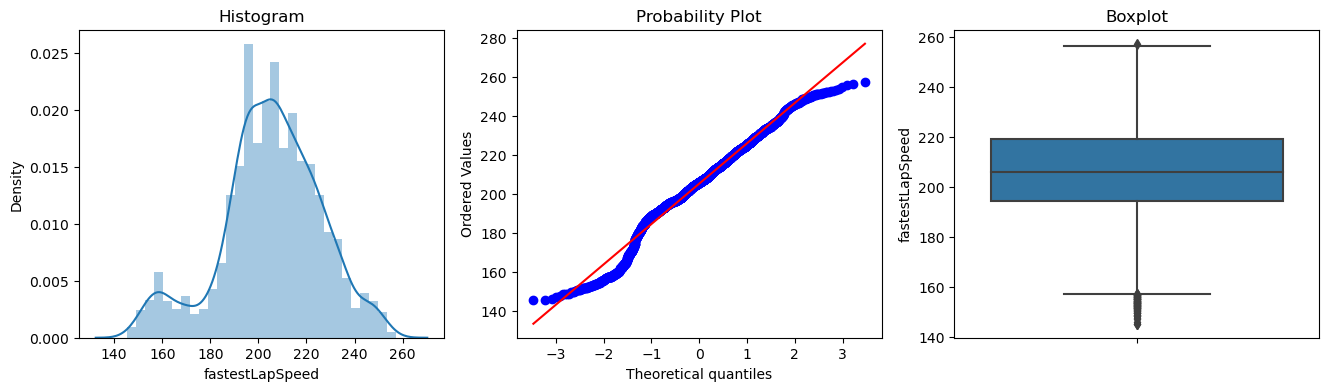

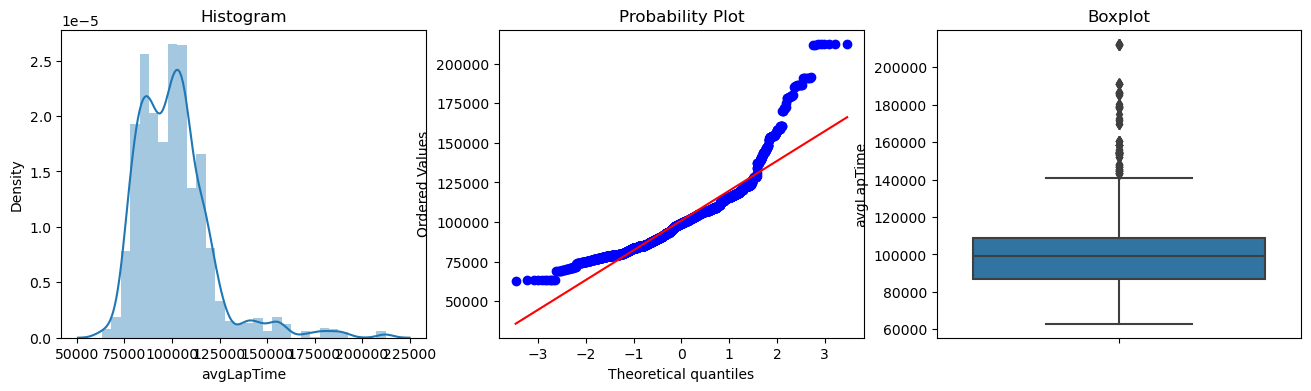

In [306]:
num_cols = ['milliseconds', 'fastestLapSpeed', 'avgLapTime']
for x in num_cols:
    diagnostic_plots(X_train, x)

In [307]:
windsorizer = Winsorizer(capping_method ='quantiles', 
                        tail='both', # cap left, right or both tails
                        fold =0.05,
                        variables=['milliseconds', 'fastestLapSpeed', 'avgLapTime'])

windsorizer.fit(X_train)

Winsorizer(capping_method='quantiles', fold=0.05, tail='both',
           variables=['milliseconds', 'fastestLapSpeed', 'avgLapTime'])

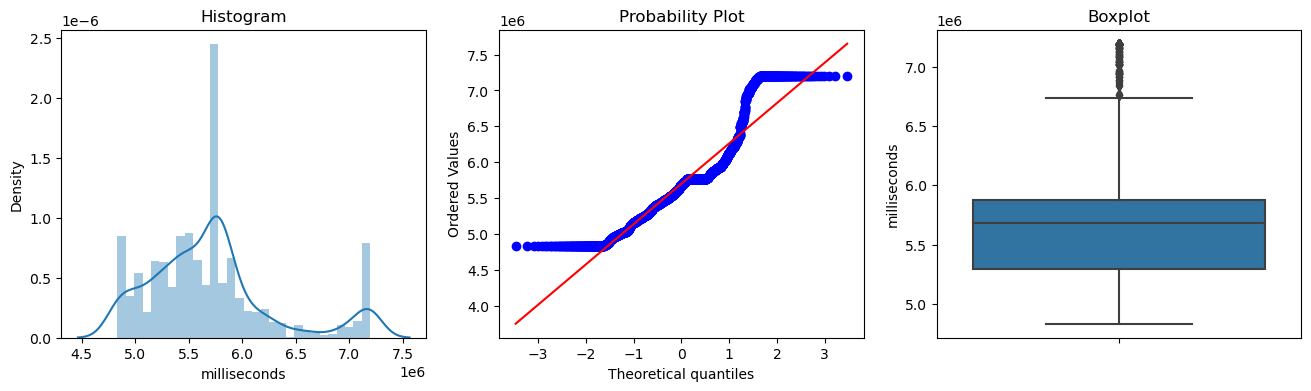

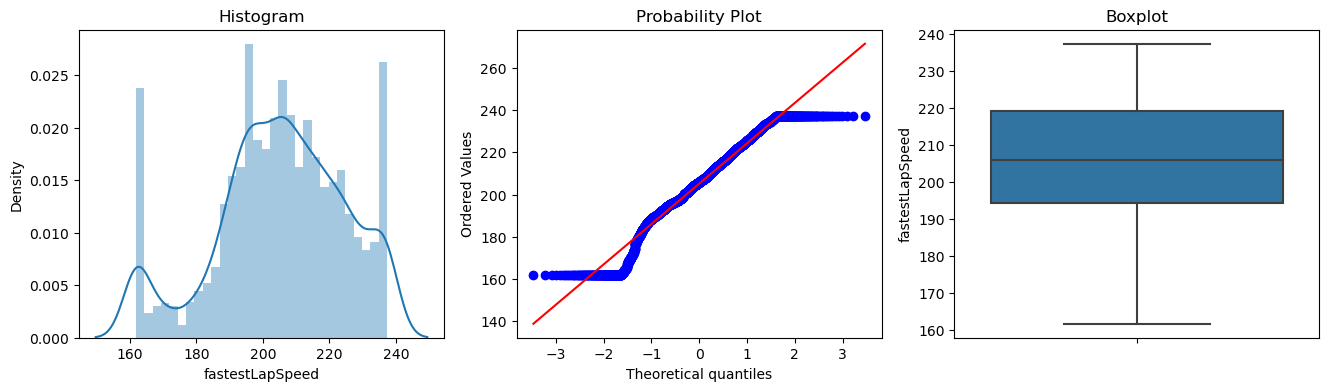

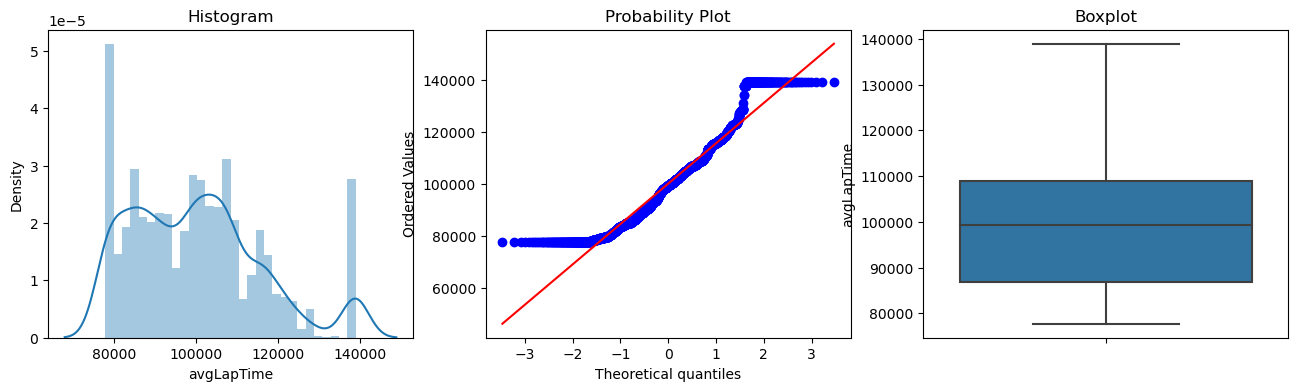

In [308]:
X_train = windsorizer.transform(X_train)
X_test = windsorizer.transform(X_test)
for x in num_cols:
    diagnostic_plots(X_train, x)

### Categorical data encoding
<a id="catEnc"></a>
[Back to report](#report)

In [309]:
X_train.head()

circuitName  grid  positionOrder  milliseconds  rank  \
9622     silverstone    17              9  4.845272e+06    12   
10033    hungaroring    10             11  6.036686e+06    15   
11535         jeddah     3              2  7.195186e+06     3   
12695     interlagos    23             18  5.771754e+06    20   
6115   red_bull_ring    10              5  5.023887e+06     2   

       fastestLapSpeed       driverRef  driverSeasonPoints  driverWins  \
9622          235.8750           kvyat                  12           0   
10033         183.2350      hulkenberg                  15           0   
11535         237.3617  max_verstappen                   3           9   
12695         190.2330     karthikeyan                  20           0   
6115          229.4020           sainz                   2           0   

      constructorRef  constructSeasonPoints  constructWins  driverAge  \
9622      toro_rosso                   19.0              0         25   
10033    force_india                   46.0              0         24   
11535       red_bull                  559.5             10         24   
12695            hrt                    0.0              0         35   
6115         ferrari                  122.0              0         26   

          avgLapTime  
9622    95005.333333  
10033   88774.794118  
11535  138942.645098  
12695   84878.731187  
6115    77729.389740

In [310]:
cat_cols = ['circuitName', 'driverRef', 'constructorRef']

<bound method Axes.bar of <Axes: >>

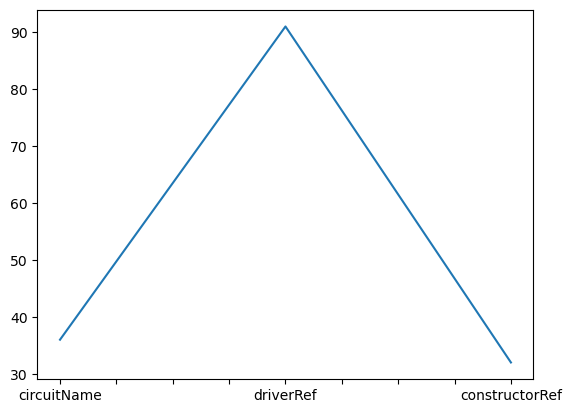

In [311]:
df[cat_cols].nunique().plot().bar

All the categorical columns have an extremely high cardinality, so I will have to group the rare categories together before performing ordinal encoding.

In [312]:
def rare_category(data, variable):
    label_freq = data[variable].value_counts()/len(data)
    fig = label_freq.sort_values(ascending=False).plot.bar()


    # add axis labels and title
    fig.set_xlabel('Variable: {0}'.format(variable))
    fig.set_title('Identifying Rare Categories')
    plt.show()

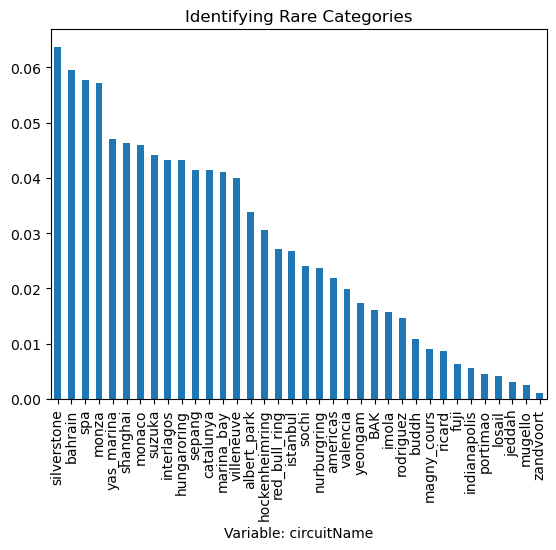

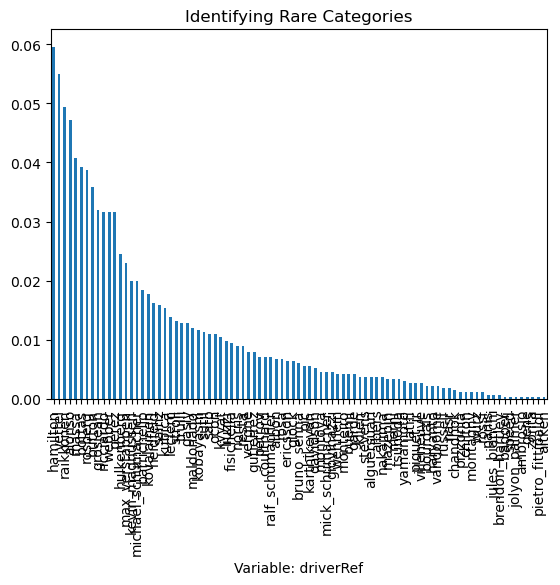

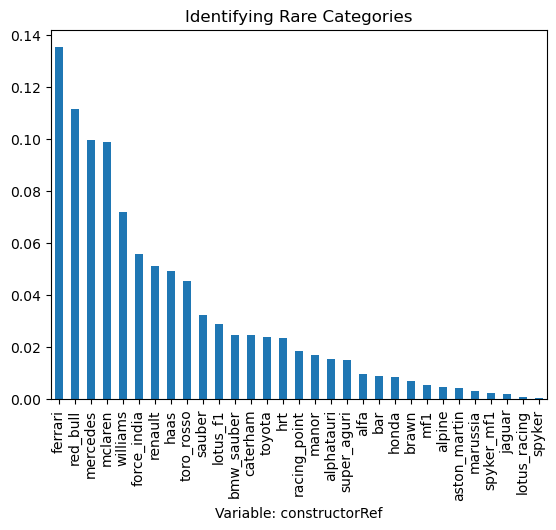

In [313]:
for x in cat_cols:
    rare_category(X_train, x)

After looking at the charts, I have decided to set the tolerance for the rarelabel encoder to 0.01 for circuitName and constructorRef, 0.005 for driverRef

#### Rare Encoding

In [314]:
# n_categories is 70 so it only encodes driverRef
rare_encoderCircuitConstructor = RareLabelEncoder(tol=0.01, variables = ['circuitName', 'constructorRef'])
rare_encoderDriver = RareLabelEncoder(tol = 0.005, variables = ['driverRef'])

In [315]:
rare_encoderCircuitConstructor.fit(X_train)

X_train = rare_encoderCircuitConstructor.transform(X_train)
X_test = rare_encoderCircuitConstructor.transform(X_test)

In [316]:
rare_encoderDriver.fit(X_train)

X_train = rare_encoderDriver.transform(X_train)
X_test = rare_encoderDriver.transform(X_test)

#### Ordinal Encoding

In [317]:
ordinal_enc = OrdinalEncoder(
    encoding_method='arbitrary',
    variables=cat_cols)

In [318]:
ordinal_enc.fit(X_train, y_train)

OrdinalEncoder(encoding_method='arbitrary',
               variables=['circuitName', 'driverRef', 'constructorRef'])

In [319]:
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

In [320]:
X_train.head()

circuitName  grid  positionOrder  milliseconds  rank  fastestLapSpeed  \
9622             0    17              9  4.845272e+06    12         235.8750   
10033            1    10             11  6.036686e+06    15         183.2350   
11535            2     3              2  7.195186e+06     3         237.3617   
12695            3    23             18  5.771754e+06    20         190.2330   
6115             4    10              5  5.023887e+06     2         229.4020   

       driverRef  driverSeasonPoints  driverWins  constructorRef  \
9622           0                  12           0               0   
10033          1                  15           0               1   
11535          2                   3           9               2   
12695          3                  20           0               3   
6115           4                   2           0               4   

       constructSeasonPoints  constructWins  driverAge     avgLapTime  
9622                    19.0              0         25   95005.333333  
10033                   46.0              0         24   88774.794118  
11535                  559.5             10         24  138942.645098  
12695                    0.0              0         35   84878.731187  
6115                   122.0              0         26   77729.389740

### Numerical transformation
<a id="numTrans"></a>
[Back to report](#report)

In [321]:
X_train.head()

circuitName  grid  positionOrder  milliseconds  rank  fastestLapSpeed  \
9622             0    17              9  4.845272e+06    12         235.8750   
10033            1    10             11  6.036686e+06    15         183.2350   
11535            2     3              2  7.195186e+06     3         237.3617   
12695            3    23             18  5.771754e+06    20         190.2330   
6115             4    10              5  5.023887e+06     2         229.4020   

       driverRef  driverSeasonPoints  driverWins  constructorRef  \
9622           0                  12           0               0   
10033          1                  15           0               1   
11535          2                   3           9               2   
12695          3                  20           0               3   
6115           4                   2           0               4   

       constructSeasonPoints  constructWins  driverAge     avgLapTime  
9622                    19.0              0         25   95005.333333  
10033                   46.0              0         24   88774.794118  
11535                  559.5             10         24  138942.645098  
12695                    0.0              0         35   84878.731187  
6115                   122.0              0         26   77729.389740

Numerical columns are milliseconds, fastestLapSpeed, ,avgLapTime

In [322]:
num_cols = ['milliseconds', 'fastestLapSpeed', 'avgLapTime']

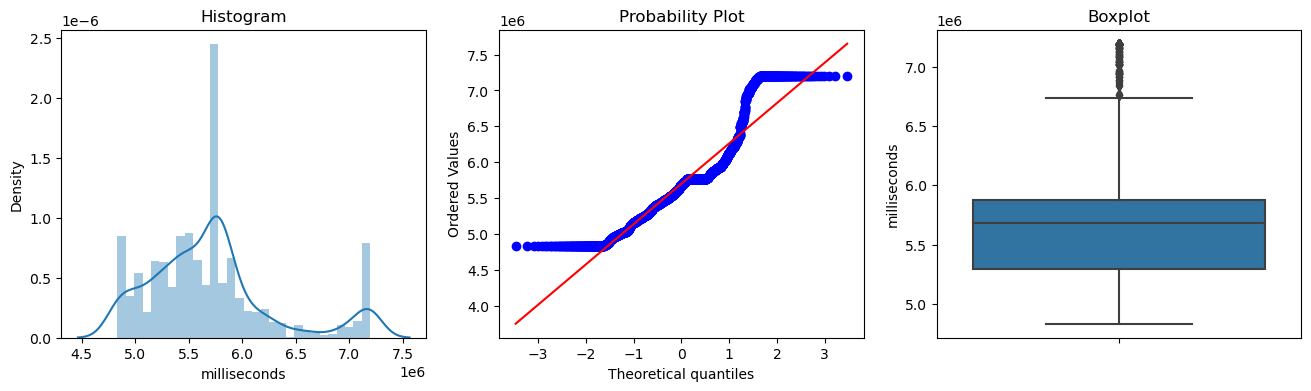

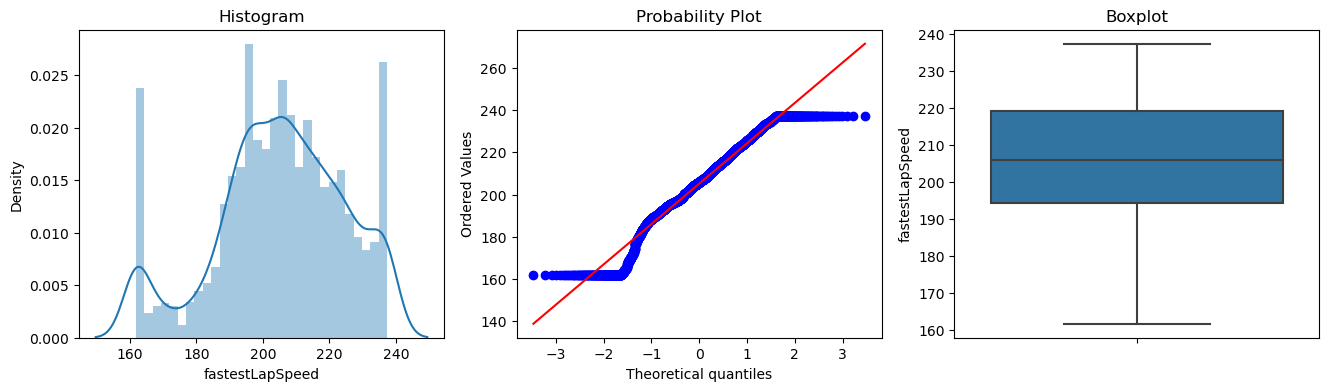

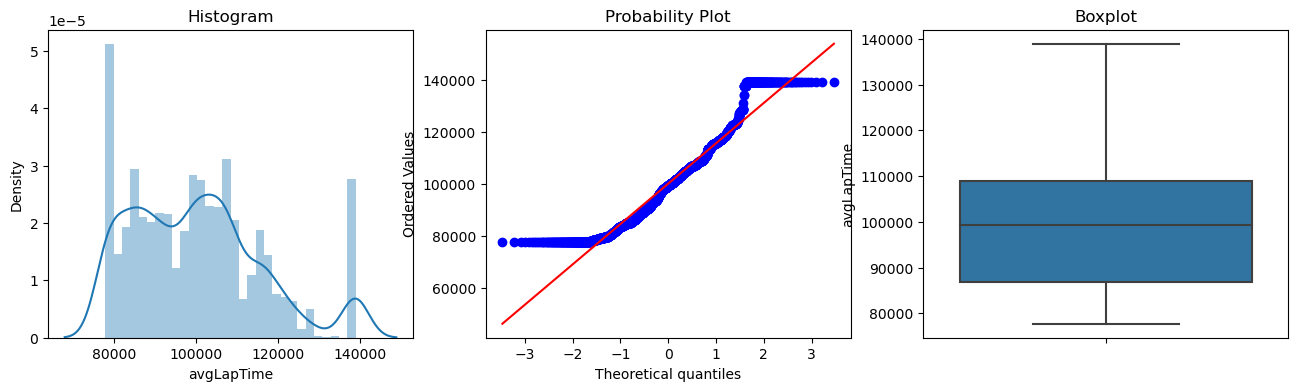

In [323]:
#looking at the original distributions for the different columns
for x in num_cols:
    diagnostic_plots(X_train, x)

#### Logarithmic transformation

In [324]:
X_trainCopy = X_train.copy()
lt = LogTransformer(variables=num_cols)

lt.fit(X_train)
X_trainCopy = lt.transform(X_trainCopy)

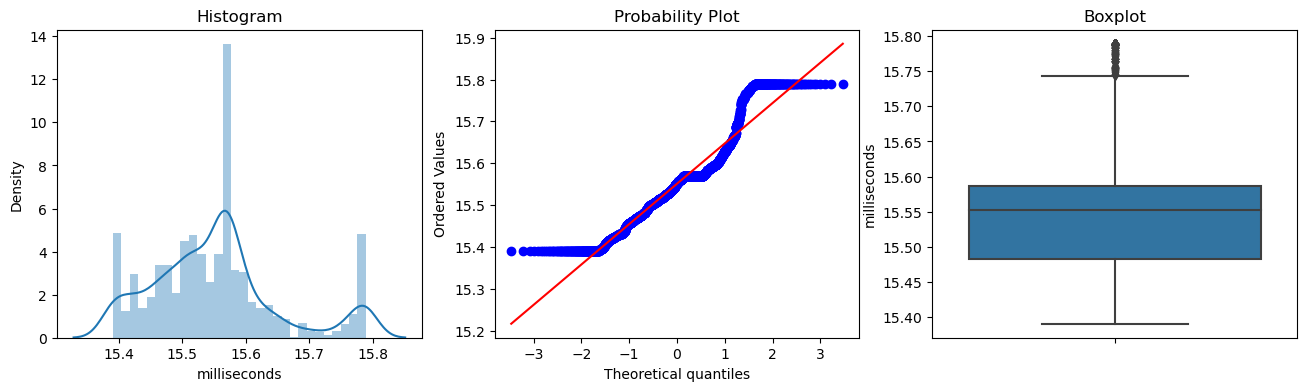

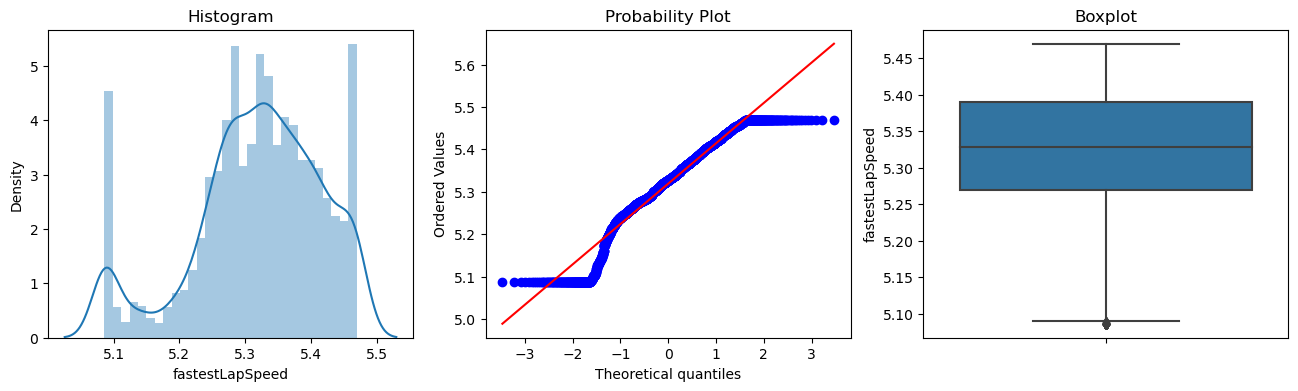

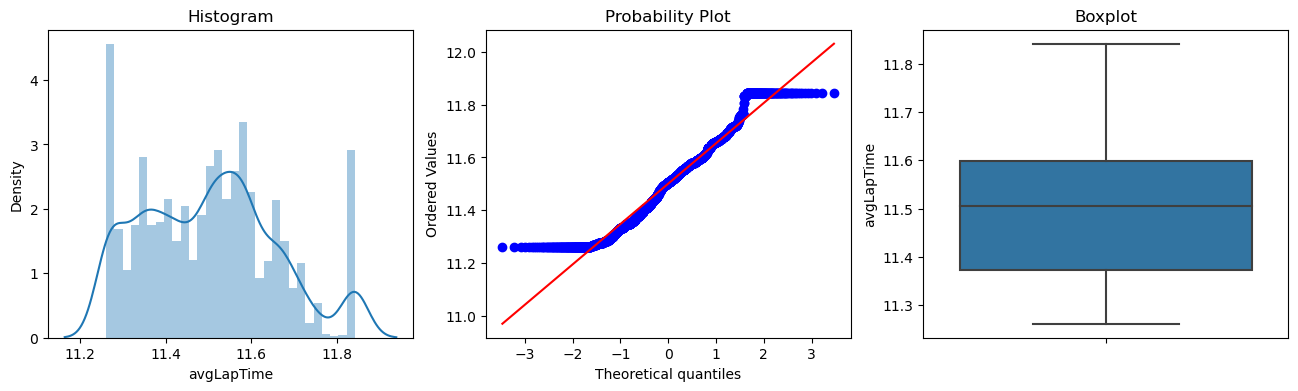

In [325]:
for x in num_cols:
    diagnostic_plots(X_trainCopy, x)

#### Reciprocal transformation

In [326]:
X_trainCopy = X_train.copy()
rt = ReciprocalTransformer(variables = num_cols)

rt.fit(X_train)
X_trainCopy = rt.transform(X_trainCopy)

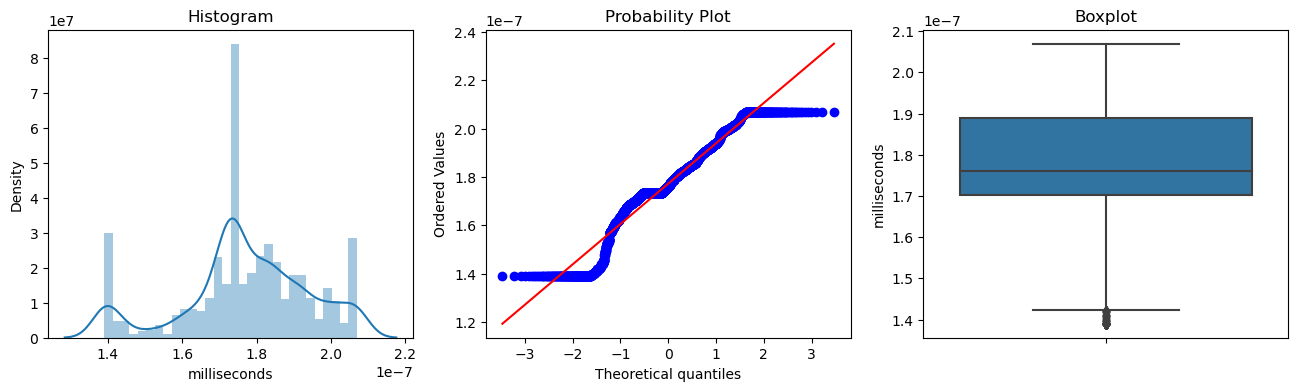

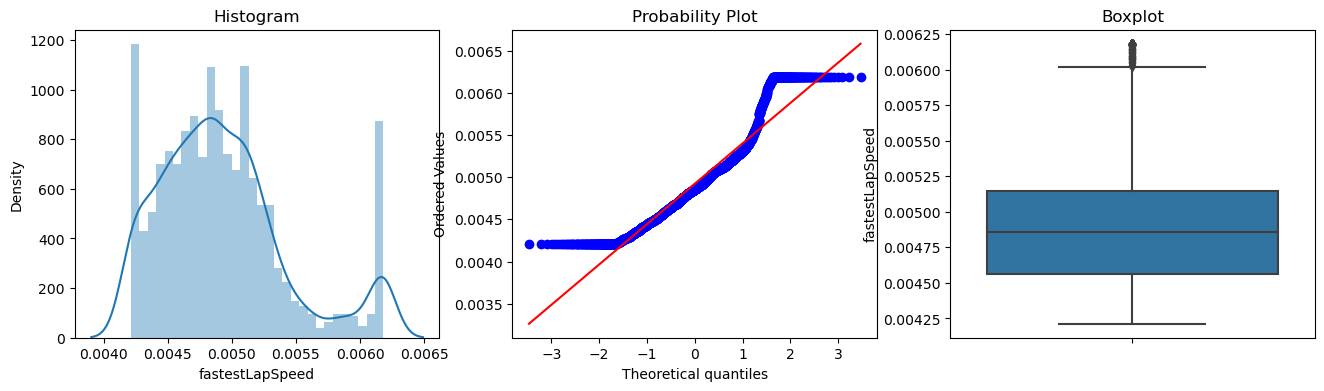

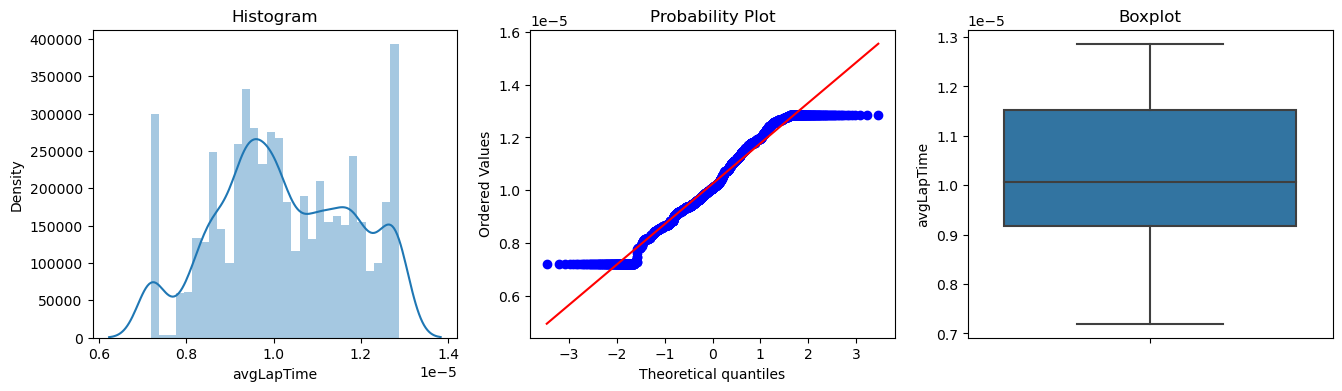

In [327]:
for x in num_cols:
    diagnostic_plots(X_trainCopy, x)

#### Square / Cube root transformation

In [328]:
X_trainCopy = X_train.copy()
et = PowerTransformer(variables = num_cols, exp=1/3) # for cube root

et.fit(X_train)
X_trainCopy = et.transform(X_trainCopy)

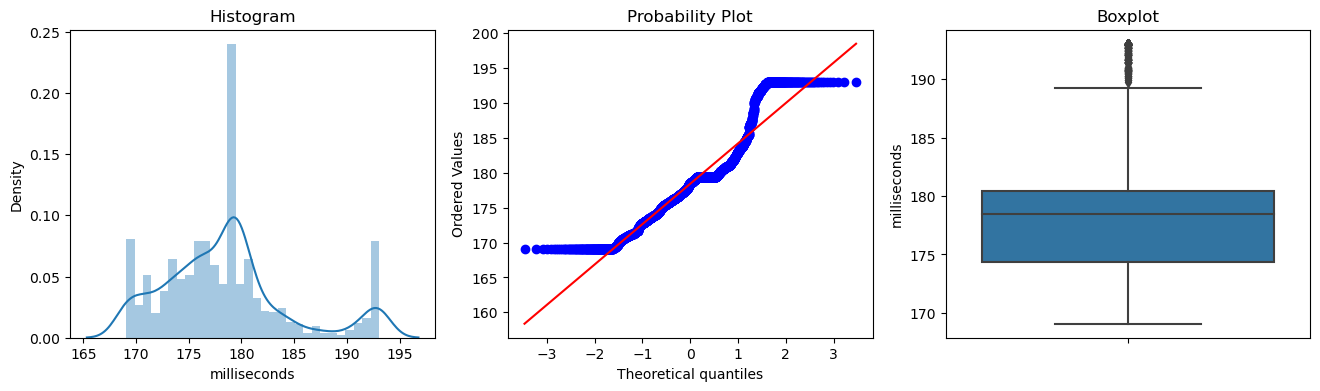

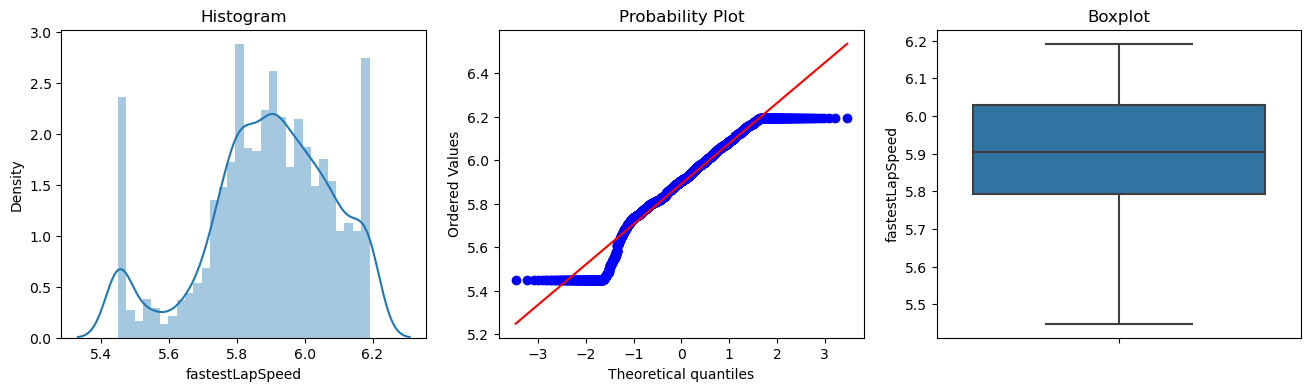

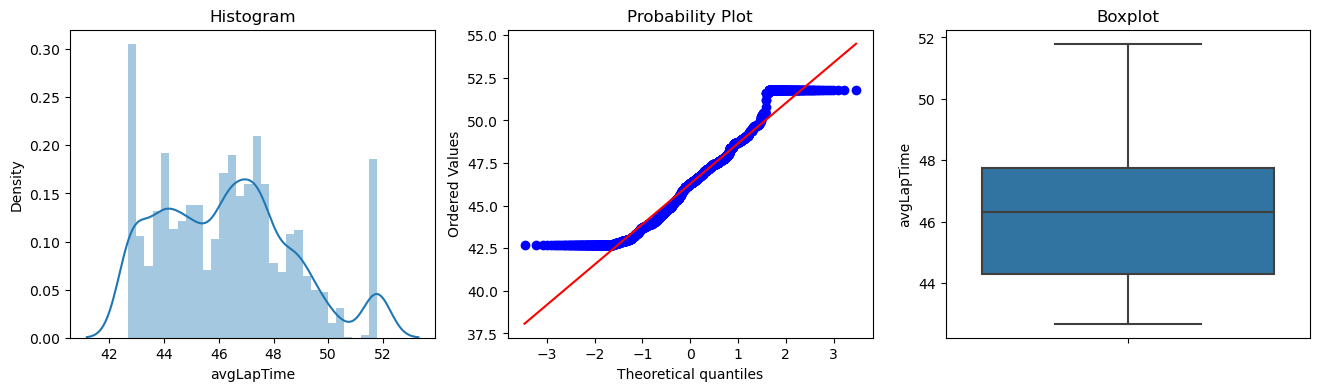

In [329]:
for x in num_cols:
    diagnostic_plots(X_trainCopy, x)

#### Power transformation

In [330]:
X_trainCopy = X_train.copy()
et = PowerTransformer(variables = num_cols, exp=3)

et.fit(X_train)
X_trainCopy = et.transform(X_trainCopy)

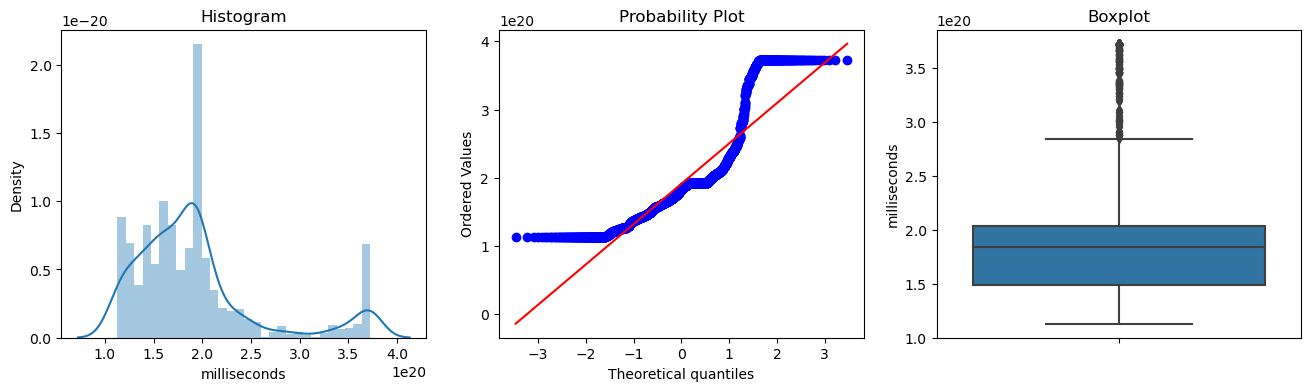

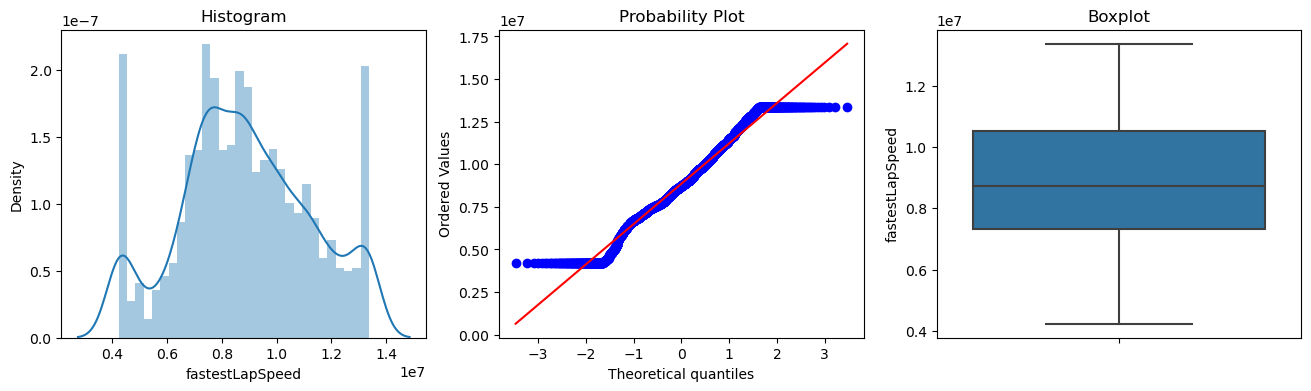

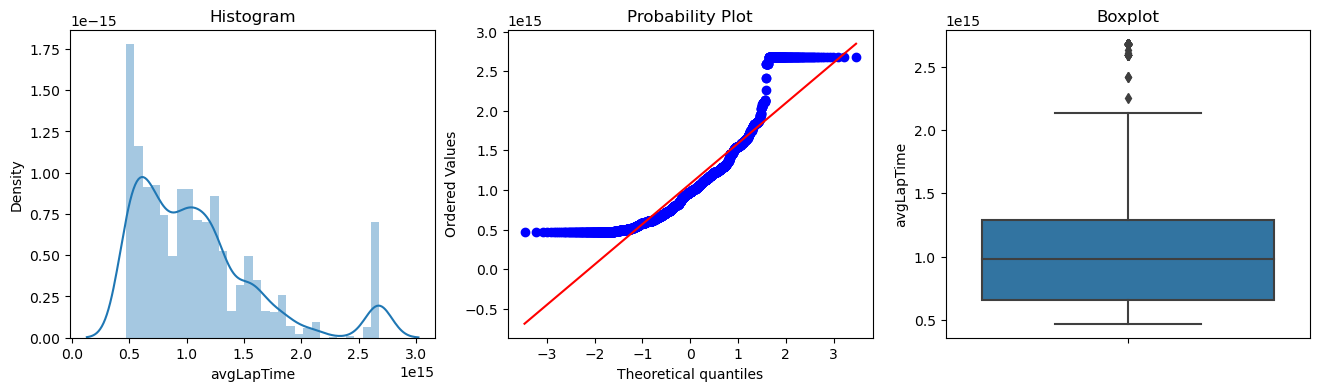

In [331]:
for x in num_cols:
    diagnostic_plots(X_trainCopy, x)

#### Boxcox transformation

In [332]:
X_trainCopy = X_train.copy()
bct = BoxCoxTransformer(variables = num_cols)

bct.fit(X_train)
X_trainCopy = bct.transform(X_trainCopy)

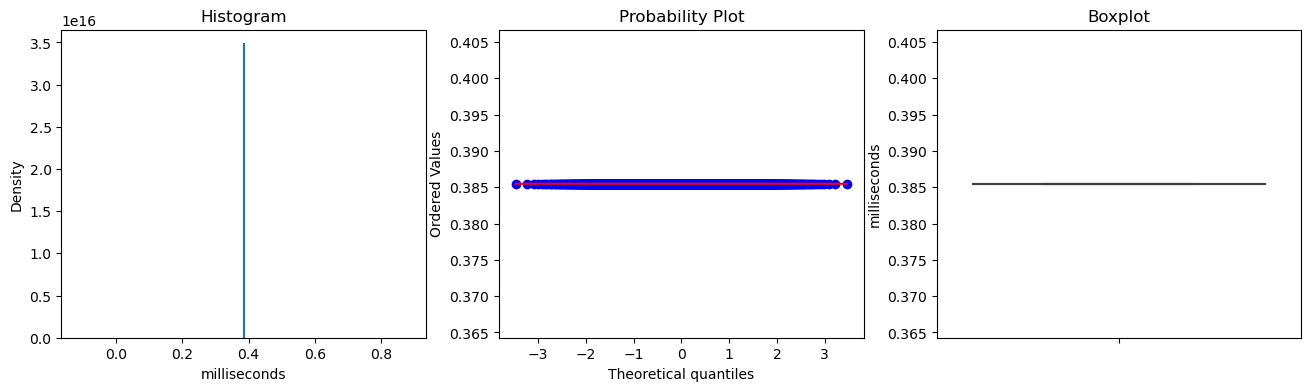

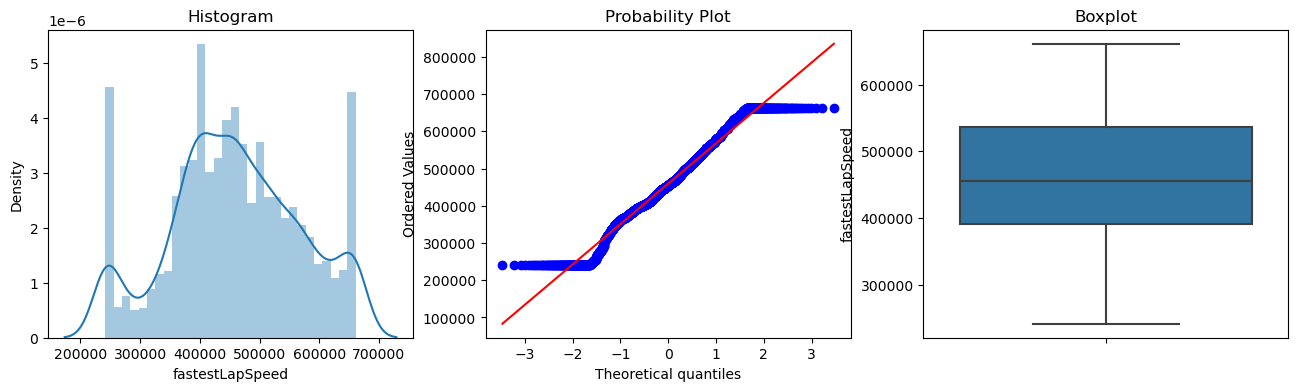

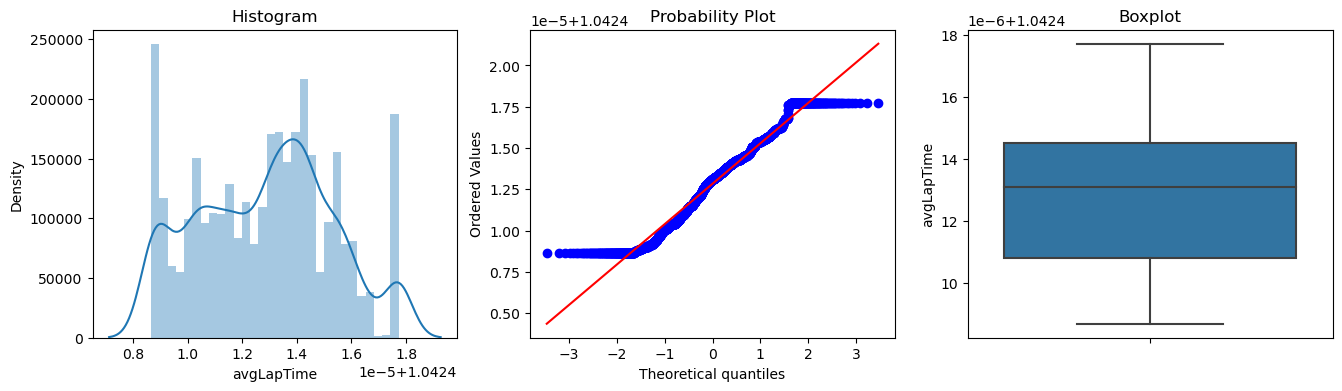

In [333]:
for x in num_cols:
    diagnostic_plots(X_trainCopy, x)

#### Yeo-Johnson transformation

In [334]:
X_trainCopy = X_train.copy()
yjt = YeoJohnsonTransformer(variables = num_cols)

yjt.fit(X_train)
X_trainCopy = yjt.transform(X_trainCopy)

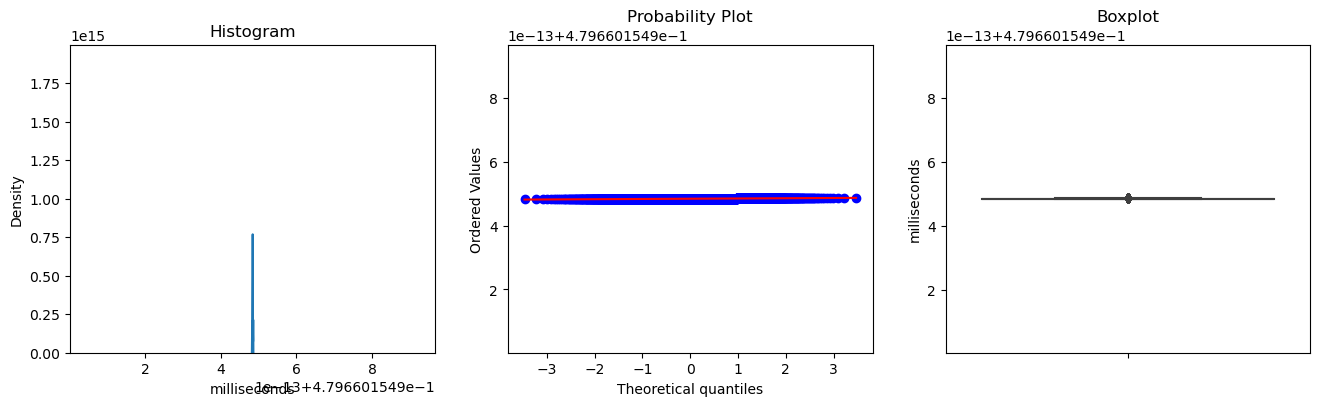

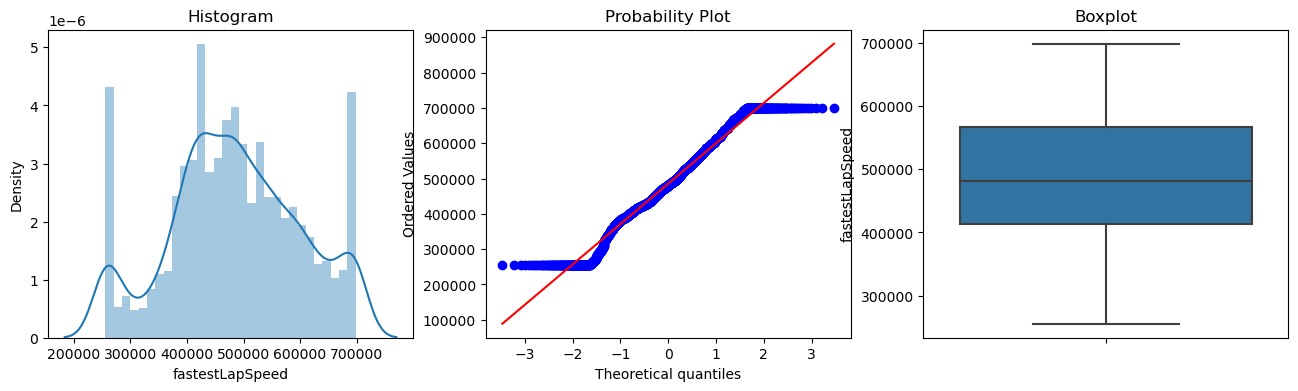

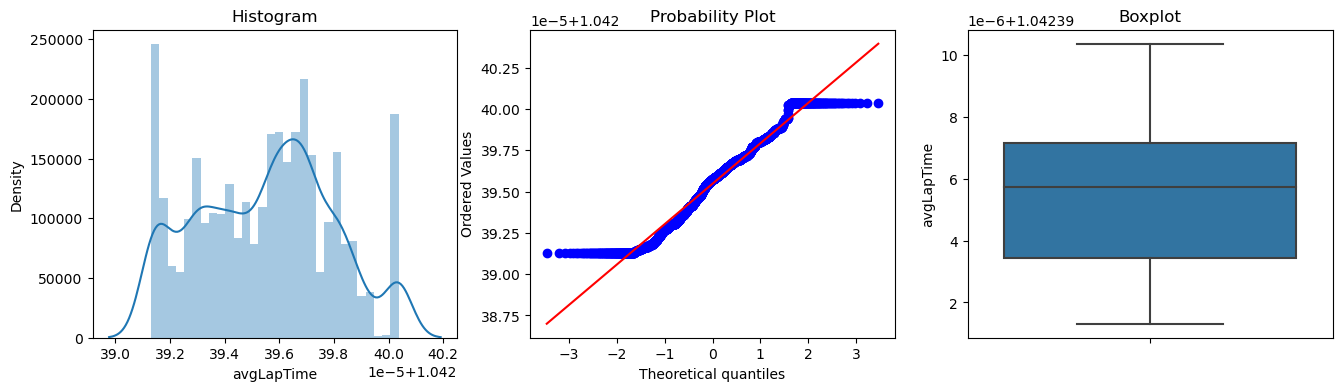

In [335]:
for x in num_cols:
    diagnostic_plots(X_trainCopy, x)

After looking at the charts, I decided on the following for the numerical variables:
 - milliseconds : reciprocal
 - fastestLapSpeed : power transformation, exp = 3
 - avgLapTime : boxcox

In [336]:
rt = ReciprocalTransformer(variables = ['milliseconds'])
rt.fit(X_train)

et = PowerTransformer(variables = ['fastestLapSpeed'], exp=3)
et.fit(X_train)

bct = BoxCoxTransformer(variables = ['avgLapTime'])
bct.fit(X_train)

BoxCoxTransformer(variables=['avgLapTime'])

In [337]:
X_train = rt.transform(X_train)
X_test  = rt.transform(X_test)

X_train = et.transform(X_train)
X_test = et.transform(X_test)

X_train = bct.transform(X_train)
X_test = bct.transform(X_test)

### Variable discretization
<a id="varDisc"></a>
[Back to report](#report)

In [338]:
X_train.head()

circuitName  grid  positionOrder  milliseconds  rank  fastestLapSpeed  \
9622             0    17              9  2.063868e-07    12     1.312338e+07   
10033            1    10             11  1.656538e-07    15     6.152127e+06   
11535            2     3              2  1.389818e-07     3     1.337310e+07   
12695            3    23             18  1.732576e-07    20     6.884265e+06   
6115             4    10              5  1.990491e-07     2     1.207234e+07   

       driverRef  driverSeasonPoints  driverWins  constructorRef  \
9622           0                  12           0               0   
10033          1                  15           0               1   
11535          2                   3           9               2   
12695          3                  20           0               3   
6115           4                   2           0               4   

       constructSeasonPoints  constructWins  driverAge  avgLapTime  
9622                    19.0              0         25    1.042412  
10033                   46.0              0         24    1.042411  
11535                  559.5             10         24    1.042418  
12695                    0.0              0         35    1.042410  
6115                   122.0              0         26    1.042409

<Axes: ylabel='driverAge'>

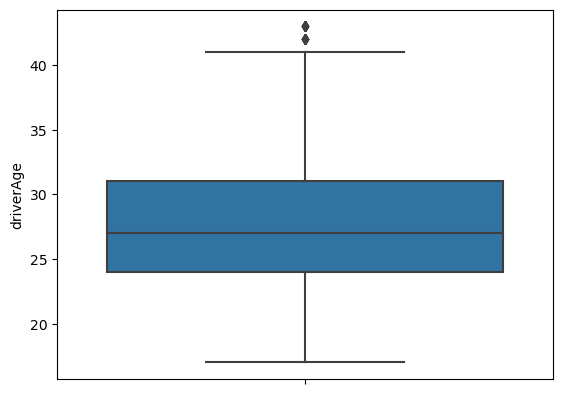

In [339]:
sns.boxplot(y=X_train['driverAge'])

In [340]:
disc = EqualWidthDiscretiser(bins=6, variables = ['driverAge'])

disc.fit(X_train)

EqualWidthDiscretiser(bins=6, variables=['driverAge'])

In [341]:
X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

Text(0, 0.5, 'Number of observations per bin')

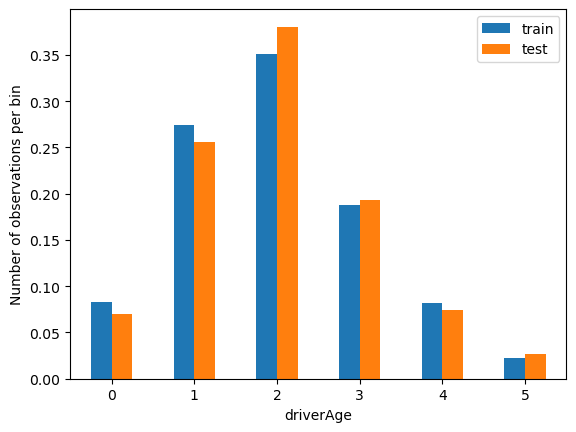

In [342]:
# if the distributions in train and test set are similar, we should expect similar propotion of
#observations in the different intervals in the train and test set

# calculate proportion of observations per interval
t1 = X_train.groupby(['driverAge'])['driverAge'].count() / len(X_train)
t2 = X_test.groupby(['driverAge'])['driverAge'].count() / len(X_test)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

#plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

### Feature Scaling
<a id="featScal"></a>
[Back to report](#report)

I decided to use Standard Scaling as it is recommended for data with outliers as it produces more robust estimates for the center and value range of the variable.

#### Robust (test)

scaler = RobustScaler()

#fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

#transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#before scaling
ax1.set_title('Before Scaling')
for x in num_cols:
    sns.kdeplot(X_train[x], ax = ax1, label = x)
ax1.legend()


#after scaling
ax2.set_title('After Scaling')
for x in num_cols:
    sns.kdeplot(X_train_scaled[x], ax = ax2, label = x)
ax2.legend()
plt.show()

#### Standard

In [343]:
X_train.head()

circuitName  grid  positionOrder  milliseconds  rank  fastestLapSpeed  \
9622             0    17              9  2.063868e-07    12     1.312338e+07   
10033            1    10             11  1.656538e-07    15     6.152127e+06   
11535            2     3              2  1.389818e-07     3     1.337310e+07   
12695            3    23             18  1.732576e-07    20     6.884265e+06   
6115             4    10              5  1.990491e-07     2     1.207234e+07   

       driverRef  driverSeasonPoints  driverWins  constructorRef  \
9622           0                  12           0               0   
10033          1                  15           0               1   
11535          2                   3           9               2   
12695          3                  20           0               3   
6115           4                   2           0               4   

       constructSeasonPoints  constructWins  driverAge  avgLapTime  
9622                    19.0              0          1    1.042412  
10033                   46.0              0          1    1.042411  
11535                  559.5             10          1    1.042418  
12695                    0.0              0          4    1.042410  
6115                   122.0              0          2    1.042409

In [344]:
scaler = StandardScaler()

#training the scaler
scaler.fit(X_train)

#transforming
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

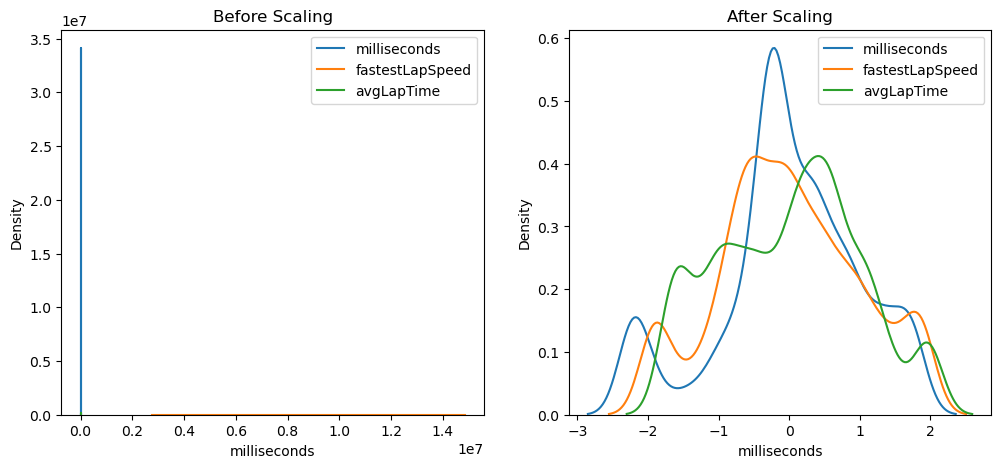

In [345]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))


ax1.set_title('Before Scaling')
for x in num_cols:
    sns.kdeplot(X_train[x], ax = ax1, label = x)
ax1.legend()


ax2.set_title('After Scaling')
for x in num_cols:
    sns.kdeplot(X_train_scaled[x], ax = ax2, label = x)
ax2.legend()
plt.show()

In [346]:
X_train = X_train_scaled.copy()
X_test = X_test_scaled.copy()

In [347]:
X_train.head()

circuitName      grid  positionOrder  milliseconds      rank  \
0    -1.516834  1.233723       0.262640      1.705337  0.641051   
1    -1.394579  0.109820       0.662129     -0.674130  1.186153   
2    -1.272324 -1.014083      -1.135573     -2.232208 -0.994255   
3    -1.150069  2.197069       2.060342     -0.229947  2.094656   
4    -1.027815  0.109820      -0.536339      1.276696 -1.175956   

   fastestLapSpeed  driverRef  driverSeasonPoints  driverWins  constructorRef  \
0         1.781761  -1.649821            0.641051   -0.400814       -1.494218   
1        -1.131477  -1.564838            1.186153   -0.400814       -1.304157   
2         1.886114  -1.479855           -0.994255    4.650588       -1.114096   
3        -0.825522  -1.394872            2.094656   -0.400814       -0.924034   
4         1.342539  -1.309889           -1.175956   -0.400814       -0.733973   

   constructSeasonPoints  constructWins  driverAge  avgLapTime  
0              -0.648634      -0.498374  -0.851802   -0.184090  
1              -0.454896      -0.498374  -0.851802   -0.658484  
2               3.229714       3.023540  -0.851802    1.971964  
3              -0.784968      -0.498374   1.759670   -0.989765  
4               0.090441      -0.498374   0.018688   -1.682168

### Feature Engineering

#### Polynomial Expansion
<a id="polyEx"></a>
[Back to report](#report)

<Axes: >

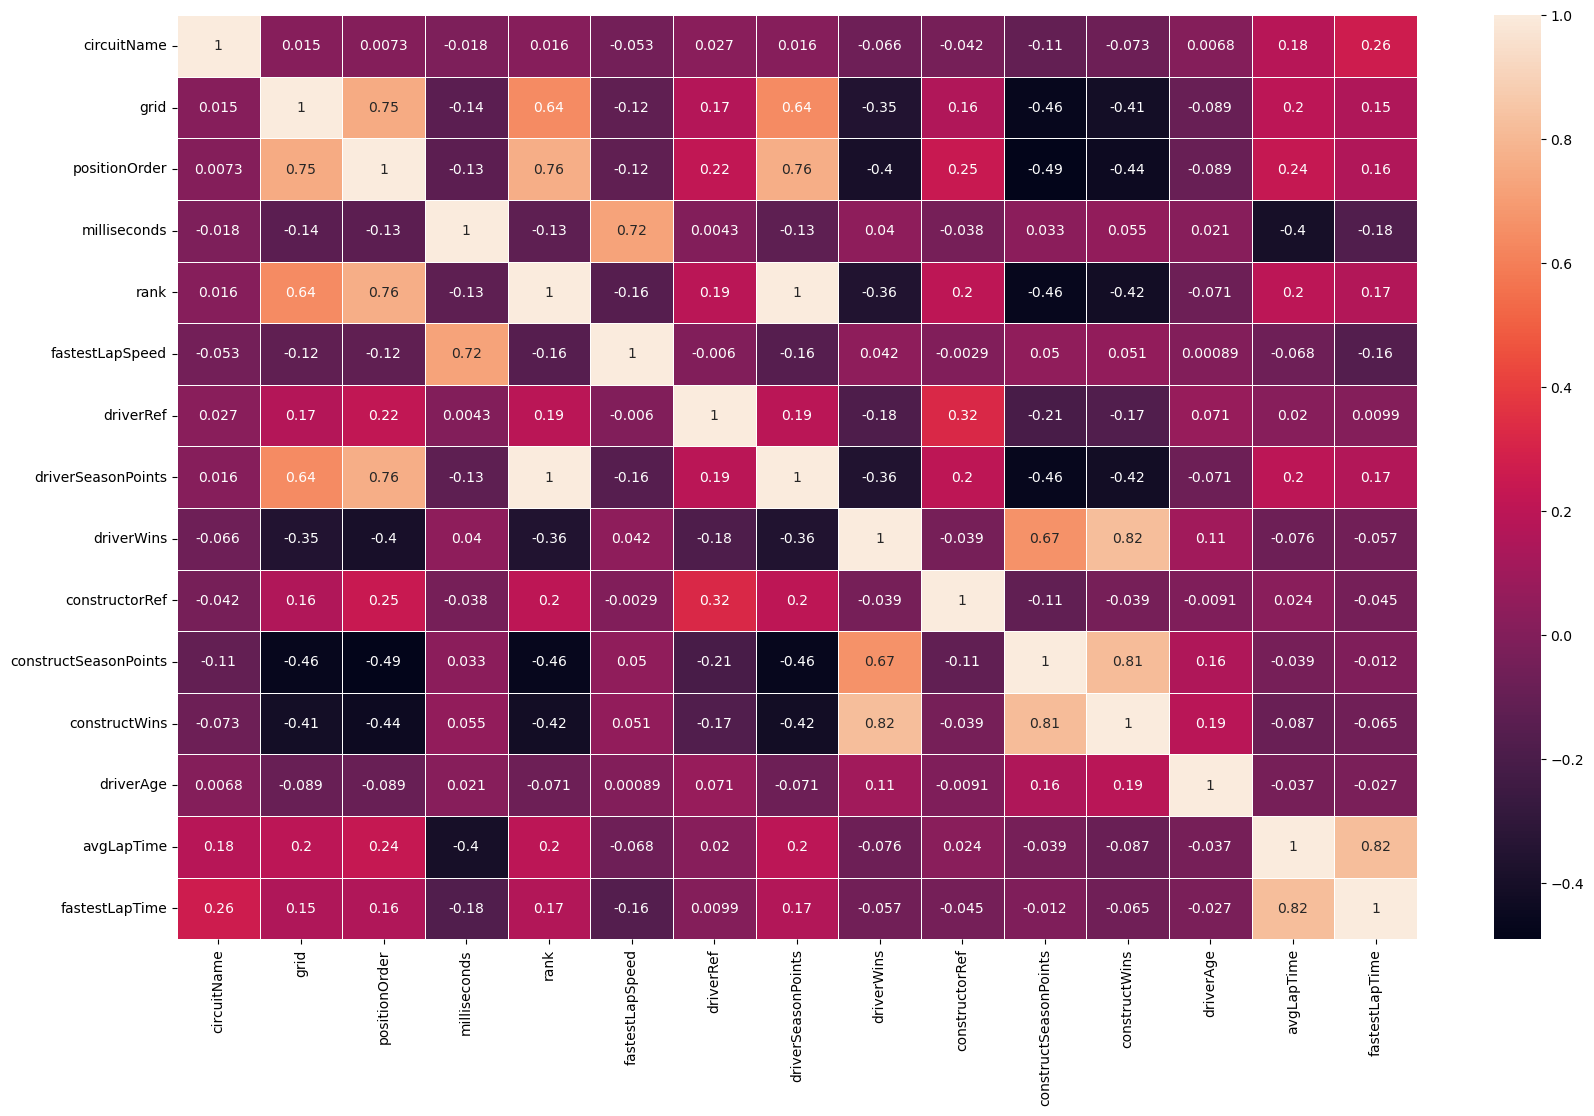

In [348]:
fig, ax = plt.subplots(figsize=(20, 12))

correlation_data = X_train.copy()
correlation_data['fastestLapTime'] = y_train.tolist()

sns.heatmap(correlation_data.corr(), annot=True, linewidth=.5)

In [349]:
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

In [350]:
polyCols = ['avgLapTime', 'driverSeasonPoints', 'fastestLapSpeed']

In [351]:
poly.fit(X_train[polyCols])
train_x = poly.transform(X_train[polyCols])
test_x = poly.transform(X_test[polyCols])

In [352]:
X_train = np.concatenate((X_train, train_x), axis=1)
X_test = np.concatenate((X_test, test_x), axis=1)

In [353]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [354]:
X_train.head()

0         1         2         3         4         5         6   \
0 -1.516834  1.233723  0.262640  1.705337  0.641051  1.781761 -1.649821   
1 -1.394579  0.109820  0.662129 -0.674130  1.186153 -1.131477 -1.564838   
2 -1.272324 -1.014083 -1.135573 -2.232208 -0.994255  1.886114 -1.479855   
3 -1.150069  2.197069  2.060342 -0.229947  2.094656 -0.825522 -1.394872   
4 -1.027815  0.109820 -0.536339  1.276696 -1.175956  1.342539 -1.309889   

         7         8         9   ...        23        24        25        26  \
0  0.641051 -0.400814 -1.494218  ... -0.006239  0.021725  0.060382 -0.075651   
1  1.186153 -0.400814 -1.304157  ... -0.285520  0.514318 -0.490610 -0.926460   
2 -0.994255  4.650588 -1.114096  ...  7.668264 -3.866303  7.334424  1.949372   
3  2.094656 -0.400814 -0.924034  ... -0.969609  2.052000 -0.808711 -4.342680   
4 -1.175956 -0.400814 -0.733973  ... -4.760011 -3.327589  3.798969 -2.326223   

         27        28        29        30        31        32  
0 -0.210267 -0.584424  0.263438  0.732208  2.035126  5.656502  
1  0.883755 -0.843019  1.668868 -1.591942  1.518562 -1.448564  
2 -3.697983  7.015118 -0.982864  1.864506 -3.536990  6.709713  
3  1.711488 -0.674512  9.190483 -3.622049  1.427481 -0.562583  
4  2.655751 -3.031960 -1.626197  1.856560 -2.119557  2.419810  

[5 rows x 33 columns]

In [355]:
X_test.head()

0         1         2         3         4         5         6   \
0 -0.172032  2.036511  2.459832 -0.319979 -0.085752 -1.010897  1.494547   
1 -1.272324 -0.050737  0.262640  0.376027  0.095949 -0.038667 -0.460060   
2  0.316987  0.591493  0.062895 -0.142071 -0.812554 -0.589748  1.664513   
3  0.806006 -1.014083 -1.135573 -2.053235 -1.357657 -1.707011  1.069632   
4 -0.538796  0.912608  0.062895  1.738609 -0.812554  1.886114  0.729701   

         7         8         9   ...        23        24        25        26  \
0 -0.085752 -0.400814  1.356701  ... -1.101003 -0.091433 -1.077869 -0.007593   
1  0.095949 -0.400814 -0.543912  ... -3.781828  0.232903 -0.093860 -0.014343   
2 -0.812554 -0.400814 -0.543912  ...  0.066249 -0.133038 -0.096558  0.267157   
3 -1.357657  0.721720  0.976579  ...  1.365142 -1.670739 -2.100656  2.044745   
4 -0.812554 -0.400814  0.786517  ... -0.711194 -0.647408  1.502773 -0.589342   

         27        28        29        30        31        32  
0 -0.089512 -1.055222 -0.000631 -0.007433 -0.087631 -1.033050  
1  0.005780 -0.002329  0.000883 -0.000356  0.000143 -0.000058  
2  0.193901  0.140732 -0.536485 -0.389378 -0.282608 -0.205115  
3  2.570901  3.232449 -2.502475 -3.146415 -3.956055 -4.974032  
4  1.367991 -3.175402 -0.536485  1.245297 -2.890603  6.709713  

[5 rows x 33 columns]

### PCA
<a id="PCA"></a>
[Back to report](#report)

In [356]:
pca = PCA()
pca.fit(X_train)

PCA()

In [357]:
train_t = pca.transform(X_train)
test_t = pca.transform(X_test)
print(len(pca.explained_variance_ratio_))
print(pca.explained_variance_ratio_)

33
[2.88846222e-01 1.82964553e-01 1.44232505e-01 4.81649766e-02
 3.43156028e-02 3.34259591e-02 2.82568166e-02 2.51827782e-02
 2.28776712e-02 2.02126376e-02 1.92378606e-02 1.80716942e-02
 1.59242121e-02 1.47998358e-02 1.30206404e-02 1.22516173e-02
 1.07379449e-02 1.00267969e-02 9.42031486e-03 8.87514507e-03
 8.65841861e-03 6.29821394e-03 5.35984961e-03 4.80403509e-03
 4.37857944e-03 3.16896293e-03 2.87919411e-03 1.90181756e-03
 1.70514500e-03 5.69648731e-32 1.26275869e-33 1.26275869e-33
 1.03655109e-33]


Text(0, 0.5, 'Percentage of Variance Explained')

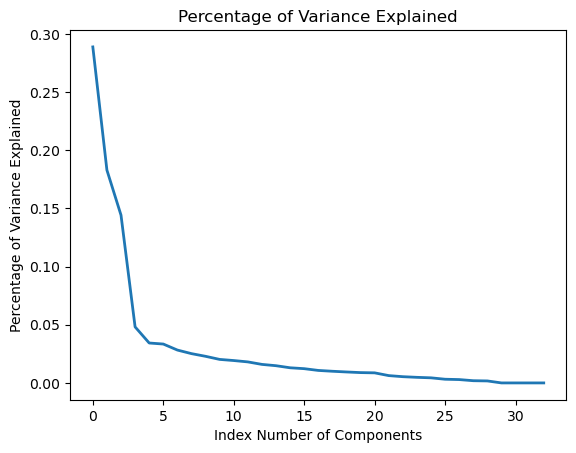

In [358]:
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.title('Percentage of Variance Explained')
plt.xlabel('Index Number of Components')
plt.ylabel('Percentage of Variance Explained')

pca = PCA(n_components=9)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

X_train.info()

### Step 4: Machine Learning Modelling

In [359]:
print(X_train.shape, X_test.shape, "\n", y_train.shape, y_test.shape)

(2655, 33) (1138, 33) 
 (2655,) (1138,)


### Linear Regression
<a id="linReg"></a>
[Back to report](#report)

In [360]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

linreg = LinearRegression().fit(X_train, y_train)
y_train_preds_linreg = linreg.predict(X_train)
y_test_preds_linreg = linreg.predict(X_test)

In [361]:
# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train
y_pred = y_train_preds_linreg

train_mse_linreg = mean_squared_error(y_true, y_pred)
print(f"The LinReg Model's MSE on train data is {train_mse_linreg:.4f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds_linreg

test_mse_linreg = mean_squared_error(y_true, y_pred)
print(f"The LinReg Model's MSE on test data is {test_mse_linreg:.4f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train
y_pred = y_train_preds_linreg

train_rmse_linreg = mean_squared_error(y_true, y_pred, squared=False)
print(f"The LinReg Model's RMSE on train data is {train_rmse_linreg:.4f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_linreg

test_rmse_linreg = mean_squared_error(y_true, y_pred, squared=False)
print(f"The LinReg Model's RMSE on test data is {test_rmse_linreg:.4f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train
y_pred = y_train_preds_linreg

train_r2_linreg = r2_score(y_true, y_pred)
print(f"The LinReg Model's R2 on train data is {train_r2_linreg:.4f}.")

# test R2 score
y_true = y_test
y_pred = y_test_preds_linreg

test_r2_linreg = r2_score(y_true, y_pred)
print(f"The LinReg Model's R2 on test data is {test_r2_linreg:.4f}.")

The LinReg Model's MSE on train data is 17497382.7732.
The LinReg Model's MSE on test data is 22119193.9398.

The LinReg Model's RMSE on train data is 4182.9873.
The LinReg Model's RMSE on test data is 4703.1047.

The LinReg Model's R2 on train data is 0.8802.
The LinReg Model's R2 on test data is 0.8445.


### Naive Baseline for Regression
<a id="naive"></a>
[Back to report](#report)

In [362]:
import numpy as np
from scipy import stats

# pick the mean target value from all of train data
print(y_train.mean())

mean_target_value = y_train.mean()

print(f"The train mean target value is {mean_target_value:.2f}.")

91506.32768361582
The train mean target value is 91506.33.


In [363]:
y_train_preds_naive = [round(mean_target_value,2) for row in X_train.iloc[:,0]]
y_train_preds_naive[0:5]

[91506.33, 91506.33, 91506.33, 91506.33, 91506.33]

In [364]:
# insert code here
y_test_preds_naive = [round(mean_target_value,2) for row in X_test.iloc[:,0]]
y_test_preds_naive[0:5]

[91506.33, 91506.33, 91506.33, 91506.33, 91506.33]

In [365]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train
y_pred = y_train_preds_naive

train_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on train data is {train_mse_naive:.2f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds_naive

test_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on test data is {test_mse_naive:.2f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train
y_pred = y_train_preds_naive

train_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on train data is {train_rmse_naive:.2f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_naive

test_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on test data is {test_rmse_naive:.2f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train
y_pred = y_train_preds_naive

train_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on train data is {train_r2_naive:.2f}.")

# test R2 score
y_true = y_test
y_pred = y_test_preds_naive

test_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on test data is {test_r2_naive:.2f}.")

The Naive Baseline Model's MSE on train data is 146012457.14.
The Naive Baseline Model's MSE on test data is 142247203.62.

The Naive Baseline Model's RMSE on train data is 12083.56.
The Naive Baseline Model's RMSE on test data is 11926.74.

The Naive Baseline Model's R2 on train data is -0.00.
The Naive Baseline Model's R2 on test data is -0.00.


# Report
<a id="report"></a>

## Table of Contents
1. Problem Formulation
    - 1.1 [Load and Explore the Data](#loadData)
    - 1.2 Understand the Data
    - 1.3 Prediction Problem
        
2. Data Wrangling on multiple tables 
    - 2.1 [Merging of tables](#mergeData)
    - 2.2 [Extraction and creation of features from different tables](#extractFeat)
        - 2.2.1 [driverAge](#driverAge)
        - 2.2.2 [avgLapTime](#avgLapTime) and [avgLapTime pt.2](#avgLapTime2)
        
3. Data Cleansing and Transformation
    - 3.1 [Cleansing for avgLapTime](#avgLapTimeCleansing)
    - 3.2 [Train Test Split](#trainTest)
    - 3.3 [Missing Value](#imputation) and [Outliers](#outliers) 
    - 3.4 [Categorical Encoding](#catEnc)
    - 3.5 [Numerical Data](#numTrans)
    - 3.6 [Discretization](#varDisc)
    - 3.7 [Scaling](#featScal)
    - 3.8 [Polynomial Expansion](#polyEx)
    - 3.9 [PCA](#PCA)
        
4. Machine Learning Model
    - 4.1 Show Count of Rows and Columns
    - 4.2 Build and Evaluate the model against a Naïve Baseline Model
        - 4.2.1 [Linear Regression](#linReg)
        - 4.2.2 [Naive Baseline](#naive)

### 1. Problem Formulation
- #### 1.1 [Loading and exploring the data](#loadData)
I explored the data by first using: 
<blockquote>df.head() and df.describe()</blockquote>
I then used pie charts and bar charts to explore the distribution and cardinality of categorical columns, while I used histograms, Q-Q plots and box plots to explore the distribution of continuous numerical columns. At this stage I was unsure on what "constructors" meant.

- #### 1.2 Understanding the data
Some tables have columns with the same names that represent different data. For example, a more obvious case would be driver_standings and constructor_standings where the “points” and “wins” columns are named the same, but they represent the points and wins of different types of objects. I also found that all the categorical columns across all the tables have a very high cardinality. Null values in every table are represented by the string “\N”, meaning that the data types of the columns in the table were not the same as the ones given in the data dictionary.
<br>
Through my exploration, I found out that the term "constructors" is given to the company that makes
<br>
I did not check how many "null" values there were in each column yet as I wanted to deal with them all in one-shot after merging the tables I needed.
<br>
The positionOrder column in the results table had a max value of 99.

- #### 1.3 Prediction problem
I have decided for my prediction problem is to predict the fastestLapTime for each driver in a circuit. By accurately predicting the fastest lap time of drivers in the circuit, it will be easier to predict the race performance of the driver. This can lead to empowering race strategists with insights that can lead to more optimal pit stops, decisions and strategies in a race - ultimately improving race outcomes and team performance.

### 2. Data Wrangling on multiple tables
#### 2.1 [Merging of tables](#mergeData)

The tables I decided to merge are:
- races
- circuits
- results
- driver
- driver_standings
- constructors
- constructor_standings

All merging was done with pd.Merge(how = "inner"). I checked the columns with df.head() and df.info() to decide on which columns to rename, keep, or drop as I merged the tables. These are the columns I decided to keep:

- ##### Races
I merged this table as I needed to use the raceId column for merging the other tables.
    
    -	raceDate. I needed this for making a feature later.
    
- ##### Circuit
I merged this table as I needed to have an identifier for each circuit in order for my prediction problem to be solve-able.
    
    -	circuitRef. This is the unique identifier for each circuit
- ##### Results
This table contains important numerical data for predicting fastestLapTime.
    
    -	grid. This is the starting position of the driver in the circuit, which can affect the driver’s performance as a higher grid means the driver will have to overtake more drivers. Having more drivers in front of you will lengthen your fastestLapTime as it means you are limited by the performance of the drivers in front of you.

    -	positionOrder. This shows the positions in which the drivers finish the race. The general consensus is that the lower your position is, the better you are as a driver.

    -	Milliseconds. This is the total time taken for the driver to finish the race which will be useful in making features and predicting the fastestLapTime.

    -	Rank. This is the ranking of the driver’s fastestLapTime compared to others.
    
    -   Laps. This is needed for the making of a feature later.

    -	fastestLapSpeed. Using the fastestLapSpeed of the driver for the circuit can help determine fastestLapTime as the distance of the circuit does not change over the years.

- ##### Drivers
I needed to have an identifier for each driver to distinguish between their skills

    -	driverRef. This is the unique identifier for each driver.
    
    -   dob. I needed this to make one of my features later on.

- ##### drivers_standings
This table is the closest thing I have to represent the performance and skill level of the driver.

    -	points

    -	wins
The rationale for these 2 columns is that the points and wins are proportional to a driver’s skill, which affects their fastestLapTime. 

- ##### Constructor
I needed an identifier for each constructor.

    -	constructorRef. This is the unique identifier for each constructor

- ##### Constructor_Standings
This table is the closest thing I have to represent the performance and skill level of the constructor.

    -	points

    -	wins
The rationale for these 2 columns is that a factor of points and wins for constructors is its performance, which is affected by factors such as engine power and aerodynamics. I felt these columns were the best representation of the performance of the constructors.

#### 2.2. [Extraction and creation of features](#extractFeat)
From the tables I extracted, I decided to make two features:

[driverAge](#driverAge)

    - The older a driver is, the more likely it is that they have more experience which is a big factor of performance in competitions as whole, and not just in racing.
This feature was made by first changing the data type of the raceDate and dob column to datetime. However, the raceDate column contained nulls and typos in some years so I fixed that first before finding the time difference between the dob column and raceDate. I used raceDate instead of the current date as it more accurately reflects how old the driver was when they took part in the race and therefore their experience.  

[avgLapTime](#avgLapTime)

    - The average lap time for the circuit. The shorter the average lap time, the more likely that the fastestLapTime would be shorter as well. This feature was created after handling outliers and missing values in the milliseconds column.
This feature was made from dividing milliseconds by laps. However, the catch was that the milliseconds column contained data from my target variable, fastestLapTime, as the milliseconds column represents the total time taken for the race, and fastestLapTime is part of that. This means that if I just divided straight away, there could be data leakage from my target variable into my train set. So, I converted the values in fastestLapTime into milliseconds and subtracted from the milliseconds column. I then subtracted 1 from the Laps column and only then did I calculate average lap time.


### 3. Data Cleansing and Transformation
#### 3.1 [Cleansing for avgLapTime](#avgLapTimeCleansing)
For data cleaning and transformation, I started off with performing the cleansing I needed to create my 2nd feature. I checked for null values in milliseconds and discovered that over 50% of the values were null, meaning I needed to find ways to reduce the amount of nulls. Since I plan on using mean imputation, I had to ensure that I weeded out the outlier values in the “Laps” column as it had a large range which will strongly affect my imputation. I did this by removing all the values outside the interquartile ranges of the column with this code:
<blockquote> 
Q1 = df['laps'].quantile(0.25)
Q3 = df['laps'].quantile(0.75)

IQR = Q3 - Q1
    
lower_bound = Q1 - 1.5 * IQR
    
df = df[(df['laps'] >= lower_bound)]

sns.boxplot(y=df['laps'])
    </blockquote> 
    
I couldn’t drop all the rows with nulls for milliseconds as that meant I would lose over 50% of my data. So, I decided to remove 80% of the rows with nulls in order to balance between the loss of data and the impact of imputed data while preserving as much data as possible for my train set to not be biased. This is the code I used:
<blockquote>
nan_indices = df.index[df['milliseconds'].isna()]
    
df = df.drop(nan_indices[:int(len(nan_indices) * 0.8)])
    </blockquote>
###  Data cleansing
#### 3.2 [Missing values](#imputation)
The only column with missing values left were “milliseconds”, so I decided to use mean imputation to preserve the original distribution of the “milliseconds” column and not introduce any bias into the dataset. Biases were even more dangerous now as the number of rows I had was decreased significantly from removing 80% of the null rows previously, meaning any trace of biasness would be more effective than it had been previously.

#### 3.2 [Outliers](#outliers)
At first I was unsure if I wanted to handle the outliers in my data as the tradeoff for not letting outliers influence my model is potential insights that could only be found within outliers. At first, I wanted to leave the outliers alone as outliers in a racing context could potentially reveal insights about a driver's performance, and it made my numerical transformations give a more normal distribution. However, I changed my mind after seeing that handling outliers improved my model's performance. I handled outliers for "milliseconds", "avgLapTime" and "fastestLapTime" using winsorization:

<blockquote>
    windsorizer = Winsorizer(capping_method ='quantiles', 
  
                        tail='both', # cap left, right or both tails
    
                        fold =0.05,
    
                        variables=['milliseconds', 'fastestLapSpeed', 'avgLapTime'])
    

windsorizer.fit(X_train)
    </blockquote>
    
### Data transformation
#### 3.3 [Categorical encoding](#catEnc)
My categorical columns that weren’t encoded at this point were circuitName, driverRef and constructorRef. After examining their amount of unique values I confirmed that they had high cardinalities, especialy driverRef. I initially decided on Target Mean Encoding as it could capture relationships between categorical variables and targets, but it raised the issue of data leakage from the target variable as the all the variables had high cardinality. So I decided to first use rare label encoding to reduce cardinality, then ordinal encoding as there weren’t any better options for encoding after that.

##### circuitName & constructorRef
<blockquote>
rare_encoderCircuitConstructor = RareLabelEncoder(tol=0.01, variables = ['circuitName', 'constructorRef'])
    </blockquote>

##### driverRef
<blockquote>
rare_encoderDriver = RareLabelEncoder(tol = 0.005, variables = ['driverRef'])
    </blockquote>
 
driverRef has a lower tolerance as it has a higher cardinality and most values are appear below 1% of the time.

#### 3.4 [Numerical Transformation](#numTrans)
For numerical transformation I tried every method of transforming using feature engine on my continuous numerical columns, and after looking at the distribution charts I decided on the folowing for them:
 - milliseconds : reciprocal
 - fastestLapSpeed : power transformation, exp = 3
 - avgLapTime : boxcox 
 
#### 3.5 [Variable discretization](#varDisc)
Initially I had no intent to discretize any variables, but I found that discretizing driverAge by equal width increased my model's score very slightly. I discretized by equal width as I felt that it was logical to group the drivers by age-ranges.

#### 3.6 [Feature Scaling](#featScal)
I used standard scaling as the range of my numerical categorical variables were in all over the place after numerical transformation. Standard scaling helps to make your data unitless.

#### 3.7 [Polynomial Expansion](#polyEx)
I used a correlation heatmap to see which variables were correlated with my target - avgLapTime. I then mix and matched 2 other variables to see which ones increased my model's score and ended up choosing driverPoints and fastestLapSpeed.

#### 3.8 [PCA](#PCA)
I plotted an explained variance ratio chart to find the elbow point and determine the amount of principal components I should have. However, slotting that value into the PCA transformer drastically lowered my model's score and thus I decided to not carry out PCA.

### 4. Machine Learning Model

- #### 4.1 Count of Rows and Columns
X_train(2655, 9) X_test(1138, 9) 
y_train(2655,)   y_test(1138,)

- #### 4.2 Build and Evaluate the model against a Naïve Baseline Model
    [Linear Regression](#linReg)
    <blockquote>


        - Train MSE: 17497382.7732
        - Test MSE: 22119193.9398

        - Train RMSE: 4182.9873
        - Test RMSE: 4703.1047

        - Train R2: 0.8802
        - Test R2: 0.8445
    </blockquote>
    
    [Naïve Baseline](#naive)
    <blockquote>


        - Train MSE: 146012457.14
        - Test MSE: 142247203.62

        - Train RMSE: 12083.56
        - Test RMSE: 11926.74

        - Train R2: -0.00
        - Test R2: -0.00
    </blockquote>

    ###### Evaluation
    <blockquote>
        Lower MSE values indicate better model performance.

        LinReg: Train MSE = 17497382.7732, Test MSE = 22119193.9398

        Naïve Baseline: Train MSE = 146012457.14, Test MSE = 142247203.62

        The LinReg model has significantly lower MSE values than the Naïve Baseline, indicating better performance.
    </blockquote>
    <blockquote>
        Lower RMSE values indicate better model performance.

        LinReg: Train RMSE = 4182.9873, Test RMSE = 4703.1047

        Naïve Baseline: Train RMSE = 12083.56, Test RMSE = 11926.74

        The LinReg model has lower RMSE values, indicating better performance.
    </blockquote>
    <blockquote>    
        R2 values range from 0 to 1, where higher values indicate better fit.

        LinReg: Train R2 = 0.8802, Test R2 = 0.8445

        Naïve Baseline: Train R2 = -0.00, Test R2 = -0.00

        The LinReg model has higher R2 values, indicating that it explains more variance in the target variable compared to the Naïve Baseline.
    </blockquote>
    
    From the comparison of the metrics above, we can see that the Linear Regression model outperforms the Naïve Baseline Model in every score. It has lower MSE and RMSE values which mean superior accuracy when predicting values. The R2 values are higher which indicates a better fit to the data. This suggests that the Linear Regression model is the better chioce for predicting the target variable, fastestLapTime.

### 5. Summary 
Some tables have columns with the same names that represent different data. For example, a more obvious case would be driver_standings and constructor_standings where the “points” and “wins” columns are named the same, but they represent the points and wins of different types of objects. I also found that all the categorical columns across all the tables have a very high cardinality. Null values in every table are represented by the string “\N”, meaning that the data types of the columns in the table were not the same as the ones given in the data dictionary.
<br>
Through my exploration, I found out that the term "constructors" is given to the company that makes
<br>
I did not check how many "null" values there were in each column yet as I wanted to deal with them all in one-shot after merging the tables I needed.
<br>
The positionOrder column in the results table had a max value of 99.

Here is the summary for what I've found during my data exploration earlier:

- Some tables have shared names for some columns that represent different sets of data.
<br>

- Most, if not all, categorical columns across all tables have high cardinality.
<br>

- Null values are represented by the string "\N", and not proper null values.
<br>

- The data types of the columns do not reflect those in the data dictionary, due to improper null value representation.
<br>

- positionOrder column in the results table has a max value of 99, which is incorrect considering the next highest value is only 39.

### 6. Possible further improvements
My first possible improvement would be that I could have experimented with more permutations for polynomial expansion.

My second possible improvement would be that I could have utilized the pitstops table. As I was finishing my report, namely the merging of tables, I realised that the data from pitstops could be useful as pitstops, maintenance is performed on the car to ensure it is at its optimal condition. This means that the next lap the car runs would have a bigger chance of having a shorter "fastestLapTime". I would create a new column named recentMaintain where if the lap the pitstop was performed on was before the "fastestLap", the value would be True, otherwise it would be false. I would then use One-Hot Encoding. However I do not have enough time so I couldn't follow up on the realization.